<a href="https://colab.research.google.com/github/mkunyosi/FLAI/blob/learning/DDS9/DDS9_ML_fim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FLAI - 9ª Competição de Machine Learning


> *Sorte é o que acontece quando a preparação encontra a oportunidade - Elmer Letterman*


Este notebook foi construído a partir do trabalho desenvolvido na 8ª Competição de machine learning. Nesta versão o código foi reagrupado para melhor entendimento onde ele seria usado.

A análise de EDA foi separada e está em outro notebook.

**Premissas relevantes para a construção deste notebook**

- Os melhores ganhos em métrica acontecem escolhendo bem as variáveis de entrada e fazendo transformações apropriadas.
- Um bom EDA ajuda a identifica potenciais variáveis para serem usadas no treinamento de um modelo, porém para saber qual variável deve, ou não, ser usada é preciso fazer testes.
- Para saber qual transformação ou engenharia de variável é boa é preciso fazer testes.
- Há muitas combinações possíveis, então é preciso testar tudo, guardar os dados e analisar posteriormente.
- Tunar modelo ajuda, porém, como já observado em outras competições, os ganhos podem não ser tão significativos.
- Para ficar entre os top 5, é necessário executar os passos anteriores e ter **sorte** para obter uma combinação das variáveis, transformações e modelos que gerem as melhores métricas

**Abordagem usada na competição**
- Utilizar o Pycaret como motor de auto de ML
- Testar diversas configurações:
 - Diferentes dataset
 - Diferentes tranformações de dados
- Utilizar o Pycaret fazer o tuning e ensemble dos modelos

**Conclusões**
Dentre as diversas configurações avaliadas durante a competição, o conjunto que gerou melhores resultados foi o seguinte:

```
    {'model_id': 14,
     'data':  [transf_create_dia_util, transf_create_hora_pico, transf_set_feriado],  # funções personalizadas	
     'test_data': None,  	 
     'setup':[('silent', True), ('session_id', 666),   	 # parâmetros de configuração para o PyCaret
                ('normalize',  True), ('normalize_method', "'minmax'"),  				
                ('feature_interaction', True),  
			] 
    }
```

Foram criadas variáveis para indicar se o dia era útil, se a hora era para demandas mais altas e foi feita a troca do dia de feriado por domingo.

Não foram feitas transformações na variável resposta antes de executar o Pycaret.

Ao chamar o PyCaret, foram escolhida a opção de normalização das variáveis numéricas com o método "minmax" e foi ativada a opção para criação de variáveis a partir de multiplicação de variáveis numéricas ("feature_interaction").

Dessa configuração os algoritmos com melhores resultados foram o *LightGBM* e o *GradientBoosting* misturados pela técnica de *voting*.


O que apresento, então, neste notebook são os passos que eu executei para obter o modelo que gerou minha 10ª submissão, aquela que obteve minha melhor pontuação (RMSE = 223,57 e RMSE = 254,47, com 1/3 da base e com toda a base de teste, respectivamente), levando-me para a 3ª posição no *ranking* geral. 

No readme do repositório onde está este notebook há outras explicações sobre o como o código foi construído. Complementarmente, entre as células de códigos também há comentários pertinentes.

Este notebook foi desenvolvido e testado apenas no ambiente do Google Colab. Para reproduzir a execução, considerae que as primeiras seções deste notebook apenas preparam o ambiente para rodar as análises com o Pycaret, porém elas precisam ser executadas para as funções criadas serem carregadas na memória do Python. A partir da seção 4 é onde está o trabalho de execução dos modelos e as respectivas análises.

Como dica, utilize o índice do plataforma Colab para se orientar dentro do notebook.

**Marcos Kunyosi** (julho/2022)


# **1.Initial setup (installs & imports)**

As funções e variáveis desta parte do código também foram usadas no módulo de EDA.

In [ ]:
MK_load_ML_modules = False
MK_load_ML_modules_newsetup = True

# MK_load_EDA_modules = False
# MK_load_EDA_modules_SweetyViz = False
# MK_load_EDA_modules_PandasProfiling = False


## Importing PyCaret (new way)

Code below was suggested by Rafael Batista on FLAI community

In [ ]:
if MK_load_ML_modules_newsetup == True:
    !pip install pycaret==2.3.10 markupsafe==2.0.1 pyyaml==5.4.1 -qq


     |████████████████████████████████| 320 kB 8.6 MB/s 
     |████████████████████████████████| 636 kB 50.8 MB/s 
     |████████████████████████████████| 88 kB 8.8 MB/s 
     |████████████████████████████████| 25.9 MB 75.6 MB/s 
     |████████████████████████████████| 1.7 MB 66.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 262 kB 66.0 MB/s 
     |████████████████████████████████| 10.4 MB 53.2 MB/s 
     |████████████████████████████████| 125 kB 23.7 MB/s 
     |████████████████████████████████| 2.0 MB 42.2 MB/s 
     |████████████████████████████████| 1.3 MB 46.1 MB/s 
     |████████████████████████████████| 56 kB 5.7 MB/s 
     |████████████████████████████████| 6.8 MB 22.8 MB/s 
     |████████████████████████████████| 167 kB 58.7 MB/s 
     |████████████████████████████████| 17.9 MB 706 kB/s 
     |████████████████

## Importing PyCaret (old way)

No Colab, ao rodar a instalação do PyCaret pela primeira vez, sempre ocorre um erro (jun/2022). Para contornar essa situação, eu reinicio o ambiente do Colab e rodo novamente a instalação.

In [ ]:
if MK_load_ML_modules == True:
    !pip install pycaret

Entretanto para garantir que o PyCaret carregue todas as bibliotecas é necessário rodar um comando adicional (ver abaixo).

In [ ]:
if MK_load_ML_modules == True:
    !pip install markupsafe==2.0.1

## Loading PyCaret functions

In [ ]:
if MK_load_ML_modules == True or MK_load_ML_modules_newsetup == True:
    from pycaret.regression import pull, setup, models, create_model, compare_models, tune_model, \
                                get_config, \
                                blend_models, get_config, add_metric, stack_models, \
                                predict_model, plot_model, predict_model, evaluate_model, \
                                finalize_model, save_config, load_config, save_model, load_model

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


## **Other Installs and imports**


In [ ]:
# importing modules
import pandas as pd 
import numpy as np

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

from IPython.display import clear_output

# importing modules for EDA analisys
import seaborn as sn
from scipy import stats
import missingno as msno

import matplotlib.pyplot as plt



# **2.My Funtions**

## **Util Functions - General purpose**

In [ ]:
from google.colab import files

def mk_export_file(df, fname, typeOfFile='excel'):
    """
    Export a dataframe or a file to the local machine.
    
    If a dataframe is passed, this function converts data into Excel format
    and export it to local machine.
    
    If a empty dataframe is passed, any file from Google Colab environment 
    would be exported to local machine.

    Parameters
    ----------
    df: dataframe
        as usual used in pandas
    fname: string
        name of the file to be exported
    typeOfFile: string (optional), 'excel' (default), 'cvs', ''
        format of the file to be exported
        '' no format will be applied, file just will be exported from Colad env.

    Returns
    -------
    There is no return. File is downloaded to the local machine

    See Also
    --------    
    .to_excel and .to_csv functions (pandas´s library)    
    .download (google.colab library)

    Examples
    --------
    >>> # downloading a pkl file (stored on Colab)
    >>> mk_export_file([], 'peackle.pkl')

    >>> # downloading a xlsx file (stored on Colab)
    >>> mk_export_file(pred, "ExcelFile.xlsx")    

    >>> # convert a dataframe into a csv file and download it
    >>> mk_export_file(df, 'sub.csv', typeOfFile='csv')  

    >>> # convert a dataframe into a Excel file and download it
    >>> mk_export_file(df, 'sub.xlsx', typeOfFile='excel')      
    """    

    subm = df    
    if typeOfFile == 'excel':
        df.to_excel(fname, sheet_name="results")
    elif typeOfFile == 'csv':
        #subm.to_csv('subm_02_test.csv', index = False)
        df.to_csv(fname, index = False)
    # elif typeOfFile == 'pkl':
    #     # do nothing
    #     pass
    else:
        # do nothing
        pass
    # else:
    #     # print(f'mk_export_file-error: invalid "typeOfFile" ({typeOfFile})')
    #     # return
    
    files.download(fname)


In [ ]:
def mk_dataset_refresh():
    """
    Copy original train and test data to new variables

    """    
    global original_train, original_test

    df_train = original_train.copy()
    df_test = original_test.copy()

    return df_train, df_test

In [ ]:
def mk_split_data(df, len, random_state=123):
    """
    Split a dataframe in two parts.

    """    
    df_sample_test = df.sample(len, random_state = random_state)
    # df_sample_test.shape
    df_sample_train = df.drop(index = df_sample_test.index)
    # df_sample_train.shape
    df_sample_test = df_sample_test.reset_index().drop('index', axis = 1)
    return df_sample_train, df_sample_test

In [ ]:
def mk_numeric_2_categorical(df, bins=4):
    """
    Convert a numerical feature into a categorical feature dividing values in bins

    Obs.: Perhaps the 'cut' function would replace this function. I have not placed tests yet.

    """    
   
    # bins=10
    temp = df.copy()
    max = np.max(temp)
    min = np.min(temp)
    max += (max - min)/bins/3
    step = (max-min)/(bins)
    
    # print(min, max, step, bins)
    # x = 38

    bins_vals = np.zeros(bins)
    idx = 0
    for i in np.arange(min, max, step):
        # print(f"i={i}")
        bins_vals[idx] = i # + min
        idx += 1

    # print(bins_vals)

    for i in range(temp.shape[0]):
        temp[i] = int((temp[i] - min)*(bins)/(max - min))
        # print (temp[i])
        temp[i] = bins_vals[int(temp[i])]

    # (temp - min)/step - (temp - min)%step
    # temp[x] = y
    # temp.value_counts()
    return temp

General charts

In [ ]:
def plot_r2(df, actual, predict, title=''):
    # fig, axes = plt.subplots(nrows=n_rows, ncols=2, squeeze=False)
    # fig.set_size_inches(12, 5 * n_rows)

    # ax[ax_idx].set_title(chart_title, y=0.98, pad=-14) #,label='big')


    fig, ax = plt.subplots()
    fig.set_size_inches(5, 5)
    ax.scatter(df[actual], df[predict], s=5, color="gray")
    ax.plot([df[predict].min(), df[predict].max()], [df[predict].min(), df[predict].max()], 'k--', lw=2)#, color="darkgray")
    ax.set_xlabel('Actual')
    ax.set_ylabel('Predicted')
    #regression line
    y_test, y_predicted = np.array(df[actual]).reshape(-1,1), np.array(df[predict]).reshape(-1,1)
    ax.plot(y_test, LinearRegression().fit(y_test, y_predicted).predict(y_test), color="gray")

    # ax.text(1, 3000, r'R² = $E=mc^2$', fontsize=15)

    if title != '':
        ax.text(df[actual].max() * 0.02, df[predict].max() * 0.97, title, fontsize=15)

    rmse = mean_squared_error(df[actual], df[predict], squared=False)    
    sAux = '$RMSE = {:0.02f}$'.format(rmse)
    # print(sAux)    
    ax.text(df[actual].max() * 0.02, df[predict].max() * 0.9, sAux, fontsize=12)

    r2 = r2_score(df[actual], df[predict])
    sAux = '$R^2 = {:0.04f}$'.format(r2)
    # print(sAux)    
    ax.text(df[actual].max() * 0.02, df[predict].max() * 0.83, sAux, fontsize=12)


    plt.show()

In [ ]:
# plt.plot()

In [ ]:
# plot_r2(pred_train, 'aluguéis', 'Label', title="Finalized Model (df_train)")

## **Pycaret: additional support functions**

Para os dados da competição foram criadas algumas funções para tratar as features do dataset em questão.

In [ ]:
def pyc_calc_RMSE(df, model, var_target, var_label, model_loaded=False):
    '''
    Calculate the RMSE running a pycaret model and using chosen data as the input
    '''
    pred_train = predict_model(model, data = df);
    base = pull();

    pred_y = pred_train[var_target]
    pred_label = pred_train[var_label]

    clear_output()
    # return pred_train, f1_score(pred_y, pred_label)
    return pred_train, mean_squared_error(pred_y, pred_label, squared=False)

In [ ]:
def pyc_calculate_mymetric(y, y_pred):
    '''
    Calculate a specific metric (used in some scenarios)
    '''
    if np.max(y) < 10:
        ret = -mean_squared_error(np.expm1(y), np.expm1(y_pred), squared=False)
    else:
        ret = -mean_squared_error(y, y_pred, squared=False)

    return ret


    # tp = np.where((y_pred==1) & (y==1), (5000-1000), 0)
    # fp = np.where((y_pred==1) & (y==0), -1000, 0)
    # return np.sum([tp,fp])

# # add metric to PyCaret
# add_metric('my metric', 'My metric', pyc_calculate_mymetric)

In [ ]:
def pyc_eval_feature_transf_all(df, transf_func):
    '''
    Run all transformation functions over the dataset
    '''
    if type(transf_func) != type([]):
        df = transf_func(df)        
    else:
        list
        for func_i in transf_func:
            df = func_i(df)            
            print(f'after transf: df={df.columns}')    

    return df

In [ ]:
def pyc_eval_feat_transf_run(n_try, df):
    '''
    Find out a model from the global list (try_data_all)
    and run all transformation functions over the dataset
    '''

    global try_data_all

    i_Model = 0
    pc_setup = 0
    bestModels = 0
    models_metrics = 0
    model_desc = ""
    model_seed = -1

    columns = df.columns

    print(f"pyc_eval_feat_transf_run -> Model to run: {n_try}")

    # findind the entry on list of all configs
    i_try_data_all_idx = -1
    for i in range(len(try_data_all)):
        if try_data_all[i]['model_id'] == n_try:
            i_try_data_all_idx = i
            break
        
    if i_try_data_all_idx < 0:
        # entry not found!
        print(f"Model not found")
        return []
    else:
        # found!
        i_Model = i_try_data_all_idx

    # running tranformation on dataset    
    if 'data' in try_data_all[i_Model]:    
        transf_func = try_data_all[i_Model]['data']  
        df = pyc_eval_feature_transf_all(df, transf_func)
    else:
        df = []
      
    return df

#### eval: setup + compare_models

In [ ]:
def pyc_eval_pycaret(n_try, df, target, n_best, metric, list_models=[], runPyC=True):
    '''
    Run a model declared in try_data_all.
    '''
    global try_data_all

    i_Model = 0
    pc_setup = 0
    bestModels = 0
    models_metrics = 0
    model_desc = ""
    model_seed = -1

    columns = df.columns

    print(f"Model to run: {n_try}")

    # findind the entry on list of all configs
    i_try_data_all_idx = -1
    for i in range(len(try_data_all)):
        if try_data_all[i]['model_id'] == n_try:
            i_try_data_all_idx = i
            break
        
    if i_try_data_all_idx < 0:
        # entry not found!
        print(f"Model not found")
        return pc_setup, bestModels, models_metrics, model_seed, model_desc 
    else:
        # found!
        i_Model = i_try_data_all_idx

    # running tranformation on target
    if 'target' in try_data_all[i_Model]:    
        transf_func_target = try_data_all[i_Model]['target']
        df = pyc_eval_feature_transf_all(df, transf_func_target)

    # running tranformation on dataset´s features
    if 'data' in try_data_all[i_Model]:    
        transf_func = try_data_all[i_Model]['data']
        # if type(transf_func) != type([]):
        #     df = transf_func(df)
        # else:
        #     # list
        #     for func_i in transf_func:
        #         df = func_i(df)            
        #         print(f'after transf: df={df.columns}')    
        df = pyc_eval_feature_transf_all(df, transf_func)


    # getting test_data dataset
    if 'test_data' in try_data_all[i_Model]:    
        test_data = try_data_all[i_Model]['test_data']
        if test_data == None:
            test_data = ''

    # checking transformation for target var
    # 'transform_target': (np.log1p, np.expm1),
    if 'transform_target' in try_data_all[i_Model]:
        # run transformation on target var
        target_transf, target_transf_inv = try_data_all[i_Model]['transform_target']
    else:
        target_transf, target_transf_inv = (None, None)
    
    if target_transf != None:
        df[target] = target_transf(df[target])

    # preparing data for eval calling
    gen_fName = 'setup'
    gen_args = 0

    # preparing arguments for setup function (PyCaret)
    gen_args = ''
    for i in try_data_all[i_Model]['setup']:
        gen_args = gen_args + i[0] + '=' + str(i[1]) + ', '

    # defining description of the configuration applyed
    model_desc = 'Params: ' + gen_args +  '; Transf: ' + str(try_data_all[i_Model]['data'])

    # finalizing the argument for set setup function (PyCaret)
    # gen_args = 'data=df, target=target, ' + gen_args
    gen_args = 'data=df, target=target, verbose=False, ' + gen_args

    if test_data != '':
        gen_args = gen_args + 'test_data=' + test_data + ', '

    # if test mode, do not continue
    if runPyC == False:
        return pc_setup, bestModels, models_metrics, model_seed, model_desc 

    print(f'Model: {n_try} (idx={i_Model}) => {gen_fName}({gen_args})')
    print(f'Desc: {model_desc}')
    # input("press any key")

    # calling setup function (PyCaret)
    #if type(gen_args) != type(0):
    pc_setup = eval('%s(%s)'%(gen_fName, gen_args))

    # add metric to PyCaret
    add_metric('my_metric', 'My_metric', pyc_calculate_mymetric)

    # Did setup run?
    if type(pc_setup) != type(0):
        # if no model was passed, use standard list
        if len(list_models) == 0:
            # models_for_trying = ['lr', 'dt', 'rf', 'et', 'lightgbm', 'gbc', 'ada']
            # models_for_trying = ['lightgbm', 'et', 'rf', 'gbr', 'knn', 'lasso', 'br', 'ridge', 'huber', 'lr', 'par']
            models_for_trying = ['lightgbm', 'gbr', 'knn', 'lasso', 'br', 'ridge', 'huber', 'lr', 'par']
        else:
            models_for_trying = list_models

        n_best = len(models_for_trying) if n_best <= 0 else n_best

        print(f'Model: {n_try} (idx={i_Model}) => Getting best {min(n_best, len(models_for_trying))} of models of {models_for_trying}...')
        
        # get seed used in PyCaret model
        df_aux = get_config('experiment__')[0][1]
        model_seed = df_aux.iloc[0].Value

        bestModels = compare_models(include = models_for_trying, n_select = min(n_best, len(models_for_trying)), sort = metric)
        models_metrics = pull()

    else:
        print(f'Number of Models: {i_Model}')
        return pc_setup, bestModels, models_metrics, model_seed, i_Model


    if target_transf_inv != None:
        df[target] = target_transf_inv(df[target])

    return pc_setup, bestModels, models_metrics, model_seed, model_desc



In [ ]:
# from pandas.core.dtypes.base import E
def pyc_eval_pycaret_run_all_models(pyc_target, pyc_metric, firstModel=1, lastModel=-1):
    '''
    Run models from try_data_all accordingly the parameters passed
    '''
    global try_data_all
    # initializing variables
    n_models = len(try_data_all)
    pc_setup, bestModels, score_df_train = [], [], []

    # preparing dataframe to store the evaluation results
    # models_metrics = pd.DataFrame(columns=['idx', 'Desc', 'Model', 'Seed', 'RMSE-train', 'Accuracy', 'AUC', 'Recall', 'Prec.', 'RMSE', 'Kappa', 'MCC', 'TT (Sec)'])
    models_metrics = pd.DataFrame(columns=['idx', 'Desc', 'Model', 'Seed', 'RMSE-train', 'RMSE', 'TT (Sec)', 'MAE', 'MSE', 'R2', 'RMSLE', 'MAPE', 'My_metric'])

    #running all configs and store the results
    # for i in range(27, n_models+1):
    if lastModel == -1:
        lastModel = n_models + 1
    else:
        lastModel += 1

    for i in range(firstModel, lastModel):        
    #for i in range(1, n_models+1):
        # df_train, _ = mk_dataset_refresh()

        # df_train_append_new = df_train_append #.drop(labels=['sol_cat', 'visibilidade_cat'], axis=1)
        # df_train, _ = mk_dataset_refresh()
        # df_train = df_train.append(df_train_append_new).reset_index().drop(labels='index', axis=1)

        df_train, _ = mk_dataset_refresh()

        # pc_setup0, bestModels0, models_metrics0, model_seed, models_desc = pyc_eval_pycaret(i, 
        #             df_train, target='aluguéis', 
        #             n_best=10, metric='my_metric'
        #             )
        pc_setup0, bestModels0, models_metrics0, model_seed, models_desc = pyc_eval_pycaret(i, 
                    df_train, target=pyc_target, 
                    n_best=10, metric=pyc_metric
                    )
        
        if pc_setup0 != 0:

            # getting model index
            models_metrics0['idx'] = i

            # getting model description
            models_metrics0['Desc'] = models_desc    
            
            # getting model seed
            models_metrics0['Seed'] = model_seed    

            # getting f1 score running the models in train dataset
            score_df_train0 = []
            for m in bestModels0:
                print(f"Calculating RMSE for {m}")
                # pred_df_train = predict_model(m, data = df_train, raw_score=True);
                df_train_test = original_train_train.copy()
                df_train_test = pyc_eval_feat_transf_run(i, df_train_test)
                pred_df_train = predict_model(m, data = df_train_test)
                # if pred_df_train.turnover_apos_1_ano[0] in ['NAO', 'SIM']:
                #     pred_y = pred_df_train.turnover_apos_1_ano.map({'NAO':0, 'SIM':1})
                #     pred_label = pred_df_train.Label.map({'NAO':0, 'SIM':1})
                # else:
                #     pred_y = pred_df_train.turnover_apos_1_ano #.map({'NAO':0, 'SIM':1})
                #     pred_label = pred_df_train.Label#.map({'NAO':0, 'SIM':1})
                pred_y = pred_df_train['aluguéis'] #.map({'NAO':0, 'SIM':1})
                pred_label = pred_df_train.Label#.map({'NAO':0, 'SIM':1})
                # score_df_train0.append(f1_score(pred_y, pred_label))       
                score_df_train0.append(mean_squared_error(pred_y, pred_label, squared=False))       
                
            models_metrics0['RMSE-train'] = score_df_train0 

            # storing new set on metrics
            models_metrics = models_metrics.append(models_metrics0)


    #print all evaluating data ordered by F1 metric
    clear_output()
    #print(models_metrics.sort_values(by='RMSE', ascending = False))
    # models_metrics.sort_values(by='my_metric', ascending = False)

    print(f'Checking results on dataframe returned')

    return models_metrics



In [ ]:

def pyc_eval_pycaret_tune_all(models, target):
    '''
    Tune all models passed in models
    '''
    bestModels_tuned = []
    bestModels_tuned_RMSEs = []
    # for i in bestModels:
    for i in models:
        model_name = str(i)
        model_name = model_name.split(sep='(')[0]
        print(f"Analysing: {model_name}")
        # bestModels_tuned.append(tune_model(i, optimize = 'RMSE'))
        bestModels_tuned.append(tune_model(i, optimize = 'RMSE', return_train_score = True)) 
                                     
        dt_results_tuned = pull()

        print(f"Calculating RMSE for {i}")
        # _, model_RMSE_train = pyc_calc_RMSE(df_train, i, "aluguéis", "Label")
        _, model_RMSE_train = pyc_calc_RMSE(df_train, i, target, "Label")

        bestModels_tuned_RMSEs.append([model_name, 
                                    i,
                                    # dt_results_tuned.loc['Mean']['RMSE'], 
                                    # dt_results_tuned.loc['Std']['RMSE'], 
                                    # model_RMSE_train ,
                                    # (dt_results_tuned.loc['Mean']['RMSE'] - model_RMSE_train)
             dt_results_tuned.loc['CV-Val','Mean'][['RMSE']][0]
            , dt_results_tuned.loc['CV-Val','Std'][['RMSE']][0]
            , dt_results_tuned.loc['CV-Val','Mean'][['R2']][0]
            , dt_results_tuned.loc['CV-Val','Std'][['R2']][0]
            , dt_results_tuned.loc['Train', np.nan][['RMSE']][0]
            , dt_results_tuned.loc['Train', np.nan][['R2']][0],
                                    model_RMSE_train ,
                                    (dt_results_tuned.loc['CV-Val','Mean']['RMSE'] - model_RMSE_train)

                                    ])

    df_bestModels_tuned_RMSEs = pd.DataFrame(bestModels_tuned_RMSEs, columns=
                                        # ['Model', 'Params', 'RMSE', 'Std', 'RMSE-Train', 'RMSE-delta']
                                        ['Model', 'Params', 'RMSE', 'RMSE-std', 'R2', 'R2-std','Train-Mean', 'Train-R2'
                                        ,'RMSE-Train', 'RMSE-delta']
                                        )

    print(f'Checking results on dataframe returned')
    return bestModels_tuned, df_bestModels_tuned_RMSEs

## **Particular functions (applied for the competition)**

### **Chart functions (applied for the competition)**
Handles particular features

In [ ]:
def chart_data_interval(df, var_aggr='aluguéis'):
    df_agg = df
    # hourAggregated = pd.DataFrame(df_agg.groupby(["hora"],sort=True)["aluguéis"].min()).reset_index() #.rename(columns={'hora': 'min'})
    hourAggregated = pd.DataFrame(df_agg.groupby(["hora"],sort=True)[var_aggr].min()).reset_index() #.rename(columns={'hora': 'min'})
    hourAggregated['group_item'] = hourAggregated['hora']
    hourAggregated['group_item'] = 'min'

    hourAggregated

    # hourAggregated02 = pd.DataFrame(df_agg.groupby(["hora"],sort=True)["aluguéis"].mean()).reset_index() #.rename(columns={'hora': 'min'})
    hourAggregated02 = pd.DataFrame(df_agg.groupby(["hora"],sort=True)[var_aggr].mean()).reset_index() #.rename(columns={'hora': 'min'})
    hourAggregated02['group_item'] = hourAggregated02['hora']
    hourAggregated02['group_item'] = 'mean'
    hourAggregated02

    hourAggregated = hourAggregated.append(hourAggregated02, ignore_index=True)
    hourAggregated

    # hourAggregated02 = pd.DataFrame(df_agg.groupby(["hora"],sort=True)["aluguéis"].max()).reset_index() #.rename(columns={'hora': 'min'})
    hourAggregated02 = pd.DataFrame(df_agg.groupby(["hora"],sort=True)[var_aggr].max()).reset_index() #.rename(columns={'hora': 'min'})
    hourAggregated02['group_item'] = hourAggregated02['hora']
    hourAggregated02['group_item'] = 'max'
    hourAggregated02

    hourAggregated = hourAggregated.append(hourAggregated02, ignore_index=True)
    hourAggregated

    # hourAggregated02 = pd.DataFrame(df_agg.groupby(["hora"],sort=True)["aluguéis"].median()).reset_index() #.rename(columns={'hora': 'min'})
    hourAggregated02 = pd.DataFrame(df_agg.groupby(["hora"],sort=True)[var_aggr].median()).reset_index() #.rename(columns={'hora': 'min'})
    hourAggregated02['group_item'] = hourAggregated02['hora']
    hourAggregated02['group_item'] = 'median'
    hourAggregated02

    hourAggregated = hourAggregated.append(hourAggregated02, ignore_index=True)
    hourAggregated

    hourAggregated['region'] = hourAggregated['hora']
    hourAggregated['region'] = 'parietal'


    return hourAggregated

In [ ]:
def chart_boxplot_show(df, lst_vars=[], lim_x_max=(-1,-1)):
    n_rows = int(len(lst_vars)/2) + (0 if len(lst_vars) % 2 == 0 else 1)

    fig, axes = plt.subplots(nrows=n_rows, ncols=2, squeeze=False)
    fig.set_size_inches(12, 5 * n_rows)

    axis_x = 0
    axis_y = 0
    for vars in lst_vars:
        # print('vars=', vars, vars.keys())
        if 'x' not in vars.keys():            
            var_y = str(vars['y'])
            # print(var_y)
            sn.boxplot(data=df, y="aluguéis", orient="v", ax=axes[axis_x][axis_y])
        else:
            if 'order' in vars.keys():  
                var_order = (vars['order'])
            else:
                var_order = None
            # print(vars['y'], vars['x'])
            # sn.boxplot(data=df, y=vars[0], x=vars[1], orient="v", x=axes[axis_x][axis_y], order=["primavera", "verão", 'outono', 'inverno'])
            sn.boxplot(data=df, y=vars['y'], x=vars['x'], orient="v", ax=axes[axis_x][axis_y], order=var_order)
        
        if 'title' in vars.keys():  
            axes[axis_x][axis_y].set(title=vars['title']);

        axes[axis_x][axis_y].set(ylim=(lim_x_max[0], lim_x_max[1]))
        
        axis_y += 1
        if axis_y == 2:
            axis_x += 1
            axis_y = 0


In [ ]:
# def chart_lim_minmax(x, d, f='max'):
def chart_lim_minmax(min, max, d):
    
    # if f == 'max':
    #     ret = int(np.max([x, x*(1+d), x+1]))
    # else:
    #     ret = int(np.min([x, x*(1-d), x-1]))
    # print(f'{f}({x})={ret}')
    # return ret

    rng = max - min
    ret_min = int(np.min([min - rng*(d), min - 1]) )
    ret_max = int(np.max([max + rng*(d), max + 1]) )

    return ret_min, ret_max

# print(chart_lim_minmax(1, .1, f='min') )
# print(chart_lim_minmax(0, 100, .1))


In [ ]:
def chart_plot_comp(df, group_var=None, title_additional=None, metric='mean', plot_single=False, var_aggr='aluguéis'):

    if group_var == None or plot_single == True:
        fig, ax= plt.subplots(nrows=1, constrained_layout=True)#)#, squeeze=False)
        fig.set_size_inches(10, 5)
    else:
        # fig,(ax0, ax1, ax2, ax3)= plt.subplots(nrows=4)
        fig, ax= plt.subplots(nrows=4, constrained_layout=True)#)#, squeeze=False)
        fig.set_size_inches(10, 20)
    # max_val=3000
    max_val=0

    hourAggregated = chart_data_interval(df, var_aggr)
    ax_idx = 0

    # fig.tight_layout()


    if plot_single == False:
        # sn.pointplot(x=hourAggregated["hora"], y=hourAggregated["aluguéis"],
        sn.pointplot(x=hourAggregated["hora"], y=hourAggregated[var_aggr],
                     hue=hourAggregated["group_item"], data=hourAggregated, 
                     join=True, ax=ax[ax_idx], hue_order=['max','mean','median','min'])
        # ax[ax_idx].set(xlabel='Hora', ylabel='Aluguéis',title="Limites:  min, max, média por hora",label='big')
        # ax[ax_idx].set(xlabel='Hora', ylabel='Aluguéis') 
        ax[ax_idx].set(xlabel='Hora', ylabel=var_aggr) 
        ax[ax_idx].set_title("Limites:  min, max, média por hora", y=0.9, pad=-14) #,label='big')
        ax[ax_idx].legend(title='Limits')    
        # max_val = np.max([max_val, hourAggregated['aluguéis'].max() * 1.1])
        max_val = np.max([max_val, hourAggregated[var_aggr].max() * 1.1])
        ax_idx += 1



    if group_var != None:
        if metric == 'min':
            # hourAggregated = pd.DataFrame(df.groupby(["hora",group_var],sort=True)["aluguéis"].min()).reset_index()
            hourAggregated = pd.DataFrame(df.groupby(["hora",group_var],sort=True)[var_aggr].min()).reset_index()
            chart_title = f"Mínimo por hora x {group_var}"
        elif metric == 'max':
            # hourAggregated = pd.DataFrame(df.groupby(["hora",group_var],sort=True)["aluguéis"].max()).reset_index()
            hourAggregated = pd.DataFrame(df.groupby(["hora",group_var],sort=True)[var_aggr].max()).reset_index()
            chart_title = f"Máximo por hora x {group_var}"
        else:
            # hourAggregated = pd.DataFrame(df.groupby(["hora",group_var],sort=True)["aluguéis"].mean()).reset_index()
            hourAggregated = pd.DataFrame(df.groupby(["hora",group_var],sort=True)[var_aggr].mean()).reset_index()
            chart_title = f"Média por hora x {group_var}"

        if ax_idx > 0:
            # sn.pointplot(x=hourAggregated["hora"], y=hourAggregated["aluguéis"],hue=hourAggregated[group_var], data=hourAggregated, join=True,ax=ax[ax_idx])
            sn.pointplot(x=hourAggregated["hora"], y=hourAggregated[var_aggr],hue=hourAggregated[group_var], data=hourAggregated, join=True,ax=ax[ax_idx])
            # ax[ax_idx].set(xlabel='Hora', ylabel=var_aggr)
            # ax[ax_idx].set(xlabel='Hora', ylabel='Aluguéis')
            ax[ax_idx].set(xlabel='Hora', ylabel=var_aggr)
            ax[ax_idx].set_title(chart_title, y=0.98, pad=-14) #,label='big')
            # ax[ax_idx].set(ylim=(chart_lim_minmax(hourAggregated['aluguéis'].min(), hourAggregated['aluguéis'].max(), .1)))
            ax[ax_idx].set(ylim=(chart_lim_minmax(hourAggregated[var_aggr].min(), hourAggregated[var_aggr].max(), .1)))
            ax_idx += 1
            
        else:
            # sn.pointplot(x=hourAggregated["hora"], y=hourAggregated["aluguéis"],hue=hourAggregated[group_var], data=hourAggregated, join=True,ax=ax)
            sn.pointplot(x=hourAggregated["hora"], y=hourAggregated[var_aggr],hue=hourAggregated[group_var], data=hourAggregated, join=True,ax=ax)
            ax.set_title(chart_title, y=0.9, pad=-14) #,label='big')
            # ax.set(ylim=(chart_lim_minmax(hourAggregated['aluguéis'].min(), hourAggregated['aluguéis'].max(), .1)))
            ax.set(ylim=(chart_lim_minmax(hourAggregated[var_aggr].min(), hourAggregated[var_aggr].max(), .1)))
            ax_idx += 1
            

        if plot_single == False:
            # hourAggregated = pd.DataFrame(df.groupby(["hora",group_var],sort=True)["aluguéis"].sum()).reset_index()
            hourAggregated = pd.DataFrame(df.groupby(["hora",group_var],sort=True)[var_aggr].sum()).reset_index()
            # sn.pointplot(x=hourAggregated["hora"], y=hourAggregated["aluguéis"],hue=hourAggregated[group_var], data=hourAggregated, join=True,ax=ax[ax_idx])
            sn.pointplot(x=hourAggregated["hora"], y=hourAggregated[var_aggr],hue=hourAggregated[group_var], data=hourAggregated, join=True,ax=ax[ax_idx])
            ax[ax_idx].set_title(f"Total por hora x {group_var}", y=0.98, pad=-14) #,label='big')
            # ax[ax_idx].set(ylim=(chart_lim_minmax(hourAggregated['aluguéis'].min(), hourAggregated['aluguéis'].max(), .1)))
            ax[ax_idx].set(ylim=(chart_lim_minmax(hourAggregated[var_aggr].min(), hourAggregated[var_aggr].max(), .1)))
            ax_idx += 1

            # hourAggregated = pd.DataFrame(df.groupby(["hora",group_var],sort=True)["aluguéis"].count()).reset_index()
            hourAggregated = pd.DataFrame(df.groupby(["hora",group_var],sort=True)[var_aggr].count()).reset_index()
            # sn.pointplot(x=hourAggregated["hora"], y=hourAggregated["aluguéis"],hue=hourAggregated[group_var], data=hourAggregated, join=True,ax=ax[ax_idx])
            sn.pointplot(x=hourAggregated["hora"], y=hourAggregated[var_aggr],hue=hourAggregated[group_var], data=hourAggregated, join=True,ax=ax[ax_idx])
            ax[ax_idx].set_title(f"Quantidade registros por hora x {group_var}", y=0.98, pad=-14) #,label='big')
            # ax[ax_idx].set(ylim=(chart_lim_minmax(hourAggregated['aluguéis'].min(), hourAggregated['aluguéis'].max(), .1)))
            ax[ax_idx].set(ylim=(chart_lim_minmax(hourAggregated[var_aggr].min(), hourAggregated[var_aggr].max(), .1)))
            ax_idx += 1


    if title_additional != None:
        if ax_idx > 1:
            fig_title = ax[0].set_title(title_additional, fontsize=20, loc='left')
        else:
            fig_title = ax.set_title(title_additional, fontsize=20, loc='left')
        
        
        fig_title.set_position([0, 1]) #Text(0.5, 0.98, 'Apenas feriados')
        print(fig_title)
        print(fig)



In [ ]:
if False:
    df = df_train[(df_train['feriado'] == 'sim')]
    chart_plot_comp(df, 'estação', metric='mean', title_additional="feriado='sim",  plot_single=False)

### **Transformation functions**
Particular for this case





Nesta seção foram declaradas as transformações que poderiam ser usadas nas tentativas de melhorar o desempenho das métricas.

#### Setting configurations to be tested in PyCaret 

In [ ]:
# features to be used by the model
feat_df_01 = ['aluguéis', 
              'hora', 'temperatura', 
              'dia', 'estação', 'feriado']


# top_contrato_alugueis = df_train['aluguéis'].quantile(0.975)


#### Transformation in dataset

##### Feature: Vento

In [23]:
def transf_create_vento_quartil(df):
    print("Dataset transformation: transf_create_vento_quartil")
    df['vento'] = mk_numeric_2_categorical(df['vento'], bins=4)
    # df = df.drop(labels='temperatura', axis=1)

    return df

##### Feature: Chuva

In [24]:
def transf_create_chuva_quartil(df):
    print("Dataset transformation: transf_create_chuva_quartil")
    df['chuva'] = mk_numeric_2_categorical(df['chuva'], bins=4)
    # df = df.drop(labels='temperatura', axis=1)

    return df

##### Feature: Umidade

In [25]:
def transf_create_umidade_quartil(df):
    print("Dataset transformation: transf_create_umidade_quartil")
    df['umidade'] = mk_numeric_2_categorical(df['umidade'], bins=4)
    # df = df.drop(labels='temperatura', axis=1)

    return df

##### Feature: Visibilidade

In [ ]:
def transf_create_visibilidade_quartil(df):
    print("Dataset transformation: transf_create_visibilidade_quartil")
    df['visibilidade'] = mk_numeric_2_categorical(df['visibilidade'], bins=4)
    # df = df.drop(labels='temperatura', axis=1)

    return df

In [26]:
def rev_visibilidade(x):
    if x < 0.45:
        return "00-44"
    # elif x < 0.69:
    #     return "45-68"
    # elif x < 0.97:
    #     return "69-96"
    # else:
    #     return "97-100"
    elif x < 0.83:
        return "45-82"
    elif x < 0.97:
        return "83-96"
    else:
        return "97-100"


In [27]:
if False:
    df_train['visibilidade_cat'] = df_train['visibilidade'].apply(rev_visibilidade)
    df_train.visibilidade_cat.value_counts()

##### Feature: Outliers

In [28]:
def set_outlier_limit(df, cond_var, cond_val, check_var, trigger_val):
    max_lin = df.shape[0]
    # df['Range_Score'] = np.zeros(max_lin)
    new_var = check_var + '_new'
    df[new_var] = np.zeros(max_lin)    

    for indice, linha in df.iterrows():
        # if linha['SCORE_NUMERICO'] <= 100:
        if linha[cond_var] == cond_val and linha[check_var] > trigger_val:
            # df.loc[indice, 'Range_Score'] = 'ATÉ 100'
            df.loc[indice, new_var] = trigger_val
        else:
            # df.loc[indice, 'Range_Score'] = linha['SCORE']
            df.loc[indice, new_var] = linha[check_var]

    df[check_var] = df[new_var]
    df = df.drop(labels=new_var, axis = 1)
    return df


In [29]:
if False:
    df = set_outlier_limit(df_train, 'estação', 'inverno', 'aluguéis', top_alugueis_estacao.inverno)
    df

In [30]:
def outlier_get_limits(df, col_name, group_col=None, group_item=None):
    # if group_col == None:
    #     q1 = df[col_name].quantile(0.25)
    #     q3 = df[col_name].quantile(0.75)
    # else:
    #     # top_alugueis_estacao = df_train.groupby(by='estação')['aluguéis'].quantile(0.975)
    #     q1 = df.groupby(by=group_col)[col_name].quantile(0.25)[group_item]
    #     q3 = df.groupby(by=group_col)[col_name].quantile(0.75)[group_item]

    # iqr = q3-q1 #Interquartile range
    # fence_low  = q1-1.5*iqr
    # fence_high = q3+1.5*iqr
    # print(f"q1={q1}; q3={q3}; iqr={iqr}; fence_low={fence_low}, fence_high={fence_high}")    

    if group_col == None:
        # q1 = df[col_name].quantile(0.25)
        # q3 = df[col_name].quantile(0.75)
        fence_high = df[col_name].quantile(0.975)
    else:        
        # q1 = df.groupby(by=group_col)[col_name].quantile(0.25)[group_item]
        # q3 = df.groupby(by=group_col)[col_name].quantile(0.75)[group_item]
        fence_high = df.groupby(by=group_col)[col_name].quantile(0.975)[group_item]
    
    fence_low = 0

    print(f"fence_low={fence_low}, fence_high={fence_high}")    

    return (fence_low, fence_high)

In [31]:
outliers_alugueis = None
outliers_alugueis_estacao_primavera = None
outliers_alugueis_estacao_inverno = None
outliers_alugueis_feriado_sim = None
outliers_alugueis_dia_domingo = None
outliers_alugueis_dia_terca = None

def outlier_get_all_limits(df):
    global outliers_alugueis, outliers_alugueis_estacao_primavera, \
        outliers_alugueis_estacao_inverno, outliers_alugueis_feriado_sim, \
        outliers_alugueis_dia_domingo, outliers_alugueis_dia_terca

    outliers_alugueis = outlier_get_limits(df, "aluguéis")

    if 'primavera' in df.columns:
        outliers_alugueis_estacao_primavera = outlier_get_limits(df, 'aluguéis', 'estação', 'primavera')
    if 'inverno' in df.columns:
        outliers_alugueis_estacao_inverno = outlier_get_limits(df, 'aluguéis', 'estação', 'inverno')

    outliers_alugueis_feriado_sim = outlier_get_limits(df, 'aluguéis', 'feriado', 'sim')

    outliers_alugueis_dia_domingo = outlier_get_limits(df, 'aluguéis', 'dia', 'domingo')
    outliers_alugueis_dia_terca = outlier_get_limits(df, 'aluguéis', 'dia', 'terça')


In [32]:
def outlier_setLimit(df, fence, col_name, group_col=None, group_item=None):

    # if group_col == None:
    #     q1 = df[col_name].quantile(0.25)
    #     q3 = df[col_name].quantile(0.75)
    # else:
    #     # top_alugueis_estacao = df_train.groupby(by='estação')['aluguéis'].quantile(0.975)
    #     q1 = df_train.groupby(by=group_col)[col_name].quantile(0.25)[group_item]
    #     q3 = df_train.groupby(by=group_col)[col_name].quantile(0.75)[group_item]

    # iqr = q3-q1 #Interquartile range
    # fence_low  = q1-1.5*iqr
    # fence_high = q3+1.5*iqr

    # df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    # print(f"q1={q1}; q3={q3}; iqr={iqr}; fence_low={fence_low}, fence_high={fence_high}")    

    fence_low = fence[0]
    fence_high = fence[1]

    max_lin = df.shape[0]    
    new_var = col_name + '_new_'
    df[new_var] = np.zeros(max_lin)    

    for indice, linha in df.iterrows():        
        # if linha[cond_var] == cond_val and linha[col_name] > trigger_val:            
        if linha[col_name] < fence_low and (group_col == None or (group_col != None and linha[group_col] == group_item)):
            df.loc[indice, new_var] = fence_low
        elif linha[col_name] > fence_high and (group_col == None or (group_col != None and linha[group_col] == group_item)):
            df.loc[indice, new_var] = fence_high
        else:            
            df.loc[indice, new_var] = linha[col_name]

    df[col_name] = df[new_var]
    df = df.drop(labels=new_var, axis = 1)
    # print(f"df.shape={df.shape}")
    # input("press an key")
    return df  #, (fence_low, fence_high)
    

In [33]:
def outlier_set_all_limit(df):
    global outliers_alugueis, outliers_alugueis_estacao_primavera, \
        outliers_alugueis_estacao_inverno, outliers_alugueis_feriado_sim, \
        outliers_alugueis_dia_domingo, outliers_alugueis_dia_terca


    df = outlier_setLimit(df, outliers_alugueis, "aluguéis")
    return df

    # if 'primavera' in df.columns:
    #     df = outlier_setLimit(df, outliers_alugueis_estacao_primavera, 'aluguéis', 'estação', 'primavera')
    # if 'inverno' in df.columns:
    #     df = outlier_setLimit(df, outliers_alugueis_estacao_inverno, 'aluguéis', 'estação', 'inverno')

    # df = outlier_setLimit(df, outliers_alugueis_feriado_sim, 'aluguéis', 'feriado', 'sim')

    # df = outlier_setLimit(df, outliers_alugueis_dia_domingo, 'aluguéis', 'dia', 'domingo')
    # df = outlier_setLimit(df, outliers_alugueis_dia_terca, 'aluguéis', 'dia', 'terça')

    return df


In [34]:
from numpy.core.fromnumeric import alltrue
def df_imput_values():
    cont_ana = True
    df_train_append = pd.DataFrame()
    # for sol in ['zero', 'no_zero']:
    #     if cont_ana == False:
    #         break
        # for visibilidade in ['ultra_high', 'other']:
        #     if cont_ana == False:
        #         break
    for estacao in ['verão', 'primavera', 'outono', 'inverno']:
        if cont_ana == False:
            break
        for dia in ['domingo', 'segunda', 'terça', 'quarta', 'quinta', 'sexta']:
            if cont_ana == False:
                break
            df_train, _ = mk_dataset_refresh()
            # df_train['sol_cat'] = df_train['sol'].apply(lambda x: 'zero' if x == 0 else 'no_zero')
            # df_train['visibilidade_cat'] = df_train['visibilidade'].apply(lambda x: 'ultra_high' if x == 0.97 else 'other')

            # df_train = df_train[df_train['sol_cat']==sol]
            # df_train = df_train[df_train['visibilidade_cat']==visibilidade]

            df_train = df_train[df_train['estação']==estacao]
            df_train = df_train[df_train['dia']==dia]
            df_group_count = pd.DataFrame(df_train.groupby(["hora"],sort=True)["aluguéis"].count()).reset_index() 

            df_group_mean = pd.DataFrame()
            df_group_mean['aluguéis'] = df_train.groupby(["hora"],sort=True)["aluguéis"].mean()

            df_group_mean['temperatura'] = df_train.groupby(["hora"],sort=True)["temperatura"].mean()
            df_group_mean['umidade'] = df_train.groupby(["hora"],sort=True)["umidade"].mean()
            df_group_mean['vento'] = df_train.groupby(["hora"],sort=True)["vento"].mean()

            df_group_mean['sol'] = df_train.groupby(["hora"],sort=True)["sol"].mean()
            df_group_mean['visibilidade'] = df_train.groupby(["hora"],sort=True)["visibilidade"].mean()

            # print(df_group_mean)    
            df_group_mean = df_group_mean.reset_index()
            # print(df_group_mean)    
            # df_group_mean = df_group_mean.set_index('hora')
            
            # print('first_step\n', df_group_mean)    
            # print(df_group_mean.info())


            for hora in range(0,24):
                if cont_ana == False:
                    break
                if hora in df_group_count['hora'].values:
                    pass
                else:
                    # df2 = pd.DataFrame([[np.nan, np.nan]], columns=df_group_count.columns)
                    df2 = pd.DataFrame([[0] * len(df_group_count.columns) ], columns=df_group_count.columns)
                    df2.loc[0,'hora'] = int(hora)
                    df_group_count = pd.concat([df_group_count, df2])

                    # df2 = pd.DataFrame([[np.nan] * (len(df_group_mean.columns) + 1) ], pd.Index([hora]), columns=df_group_mean.columns)
                    df2 = pd.DataFrame([[np.nan] * len(df_group_mean.columns) ], columns=df_group_mean.columns)                        
                    df2.loc[0,'hora'] = int(hora)    
                    df2['hora'] = df2['hora'].astype('int32')
                    df_group_mean = pd.concat([df_group_mean, df2])


            df_group_count['idx'] = df_group_count['hora']
            df_group_count = df_group_count.set_index('idx')


            # df2['hora'] = df2['hora'].astype('int32')
            # print(df2.info())
            # print ('pos_ins_horas\n', df_group_mean)
            # print (df_group_mean.info())


            df_group_mean['idx'] = df_group_mean['hora']
            df_group_mean = df_group_mean.set_index('idx')
            
            for var in ['aluguéis', 'temperatura', 'umidade', 'vento', 'sol', 'visibilidade']:
                s = df_group_mean[var]
                # df_group_mean[var] = s.interpolate(method='polynomial', order=3)
                df_group_mean[var] = s.interpolate(method='spline', order=2)
                if df_group_mean[var].min() < 0:
                    print ("Ver aqui - valor negativo", 'estacao=', estacao, 'dia=', dia, 'hora=', hora, 'var=', var)

            # print('pos-interpolation\n', df_group_mean)

            # df_group_count = df_group_count.reset_index().drop(labels="index", axis=1).set_index('hora').sort_index()

            max = df_group_count['aluguéis'].max()  
            for hora in range(0,24):
                if cont_ana == False:
                    break

                # print('...', sol, visibilidade, estacao, dia, hora, var) #, df_group['aluguéis'][hora], max)
                if df_group_count['aluguéis'][hora] < max:
                    #print ('...including', hora, df_group_count['aluguéis'][hora], max)
                    dif = int(max - df_group_count['aluguéis'][hora])
                    # print (f'ver: estacao={estacao}; dia={dia}; missing={qdd_horas}; hora={hora}; dif={dif}')
                    df2 = pd.DataFrame([[np.nan] * len(df_train.columns)], columns=df_train.columns)
                    df2.loc[0,'estação'] = estacao
                    df2.loc[0,'dia'] = dia

                    df2.loc[0,'feriado'] = 'não'
                    df2.loc[0,'chuva'] = 0

                    df2.loc[0,'hora'] = hora
                    df2['hora'] = df2['hora'].astype('int32')

                    # df2.loc[0,'sol'] = df_train.iloc[0]['sol']#.mean()
                    # df2.loc[0,'visibilidade'] = df_train.iloc[0]['visibilidade']#.mean()

                    # pd.DataFrame(df_train.groupby(["hora"],sort=True)["aluguéis"].count()).reset_index()    
                    for var in ['aluguéis', 'temperatura', 'umidade', 'vento', 'sol', 'visibilidade']:
                        if hora in df_train['hora'].values:
                            df2.loc[0, var] = df_group_mean[var][hora]
                        else:
                            df2.loc[0, var] = df_group_mean[var][hora]
                            # if var == 'vento':
                            #     print('ver aqui', sol, visibilidade, estacao, dia, hora, var, df_group_count['aluguéis'][hora], max)
                            #     print(df_group_mean)                  
                            #     print(df2)
                            #     cont_ana = False
                            #     break

                        
                    # df2.loc[0,'aluguéis'] = df_group_mean[df_group_mean['hora']==hora]['aluguéis'].mean()
                    df2 = df2.append([df2]*(dif),ignore_index=True).drop(0)                                
                    df_train_append = pd.concat([df_train_append, df2])
                    
                    # conds = [
                    #         # df_train['sol_cat']!='zero',
                    #         # df_train['visibilidade_cat']=='ultra_high',
                    #         df_train['estação']=='verão',
                    #         df_train['dia']=='domingo',
                            
                    # ]
                    # if alltrue(conds) and hora == 23:
                    #     print("ok")
                    #     print(df_group_count)
                    #     print(df_group_mean)
                    #     print(df_train_append)
                    #     cont_ana = False
                    #     break


                    # print(df_train_append.shape, '; ')
                    # cont_ana = False
                    # break

            # if a = pd.DataFrame():
            # break

    df_train_append = df_train_append.reset_index().drop(labels='index', axis=1)

    return df_train_append


##### Feature: Temperatura

In [35]:
temperatura_25 = 0
temperatura_50 = 0
temperatura_75 = 0
def transf_temperatura_cat_percent(df):
    global temperatura_25, temperatura_50, temperatura_75

    temperatura_25 = df.temperatura.describe()['25%']
    temperatura_50 = df.temperatura.describe()['50%']
    temperatura_75 = df.temperatura.describe()['75%']

    for idx, row in df.iterrows():
        if row['temperatura'] < temperatura_25:
            df.loc[idx, 'temperatura'] = 'quartil_01_' + str(int(0))        
        elif row['temperatura'] < temperatura_50:
            df.loc[idx, 'temperatura'] = 'quartil_02_' + str(int(temperatura_25))        
        elif row['temperatura'] < temperatura_75:
            df.loc[idx, 'temperatura'] = 'quartil_03_' + str(int(temperatura_50))        
        else:
            df.loc[idx, 'temperatura'] = 'quartil_04_' + str(int(temperatura_75))        
    return df


In [36]:
if False:
    df_train, _ = mk_dataset_refresh()
    df = transf_temperatura_cat_percent(df_train)

In [37]:
list_temperatura_cat10 = []
def aux_set_list_temperatura_cat10(df, bins, var_col):
    global list_temperatura_cat10
    list_temperatura_cat10 = mk_numeric_2_categorical(df[var_col], bins=bins).sort_values().unique()
    return

def transf_create_temperatura_cat10(df, include_new_Col=False):
    print("Dataset transformation: transf_create_temperatura_cat10")
    global list_temperatura_cat10

    if list_temperatura_cat10 == []:
        aux_set_list_temperatura_cat10(df, 10, 'temperatura')

    
    # if include_new_Col == False:
    #     df['temperatura'] = mk_numeric_2_categorical(df['temperatura'], bins=10)
    # else:
    #     df['temperatura_cat'] = mk_numeric_2_categorical(df['temperatura'], bins=10)
    # # df = df.drop(labels='temperatura', axis=1)    
    if include_new_Col == False:
        # df['temperatura'] = mk_numeric_2_categorical(df['temperatura'], bins=10)
        df["temperatura"] = pd.cut(df['temperatura'], 10, labels=list_temperatura_cat10)
    else:
        # df['temperatura_cat'] = mk_numeric_2_categorical(df['temperatura'], bins=10)
        df["temperatura_cat"] = pd.cut(df['temperatura'], 10, labels=list_temperatura_cat10)
    # df = df.drop(labels='temperatura', axis=1)    

    return df


In [38]:
# list_temperatura_cat10

In [39]:
def transf_create_temperatura_cat20(df):
    print("Dataset transformation: transf_create_temperatura_cat20")
    df['temperatura'] = mk_numeric_2_categorical(df['temperatura'], bins=20)
    # df = df.drop(labels='temperatura', axis=1)

    return df

def transf_create_temperatura_cat15(df):
    print("Dataset transformation: transf_create_temperatura_cat15")
    df['temperatura'] = mk_numeric_2_categorical(df['temperatura'], bins=15)
    # df = df.drop(labels='temperatura', axis=1)

    return df


##### Feature: Sol

In [40]:
def transf_create_sol_cat15(df):
    print("Dataset transformation: transf_create_sol_cat15")
    df['sol'] = mk_numeric_2_categorical(df['sol'], bins=15)
    # df = df.drop(labels='temperatura', axis=1)

    return df

def transf_create_sol_cat10(df):
    print("Dataset transformation: transf_create_sol_cat10")
    df['sol'] = mk_numeric_2_categorical(df['sol'], bins=10)
    # df = df.drop(labels='temperatura', axis=1)

    return df

def transf_create_sol_cat5(df):
    print("Dataset transformation: transf_create_sol_cat10")
    df['sol'] = mk_numeric_2_categorical(df['sol'], bins=5)
    # df = df.drop(labels='temperatura', axis=1)

    return df

def transf_create_sol_quartil(df):
    print("Dataset transformation: transf_create_sol_quartil")
    df['sol'] = mk_numeric_2_categorical(df['sol'], bins=4)
    # df = df.drop(labels='temperatura', axis=1)

    return df    


##### Creating new features

In [41]:
def transf_create_dia_util(df):
    print("Dataset transformation: transf_create_dia_util")
    df['dia_util'] = df[['dia', 'feriado']].apply(lambda x: ('não', 'sim')[
                (x['dia'] not in ['sábado', 'domingo'])
                and (x['feriado'] == 'não')
                ]
                , axis = 1)
    return df
    
def transf_create_hora_pico(df):   
    print("Dataset transformation: transf_create_hora_pico") 
    # df['hora_pico'] = df[['hora', 'dia_util', 'estação']].apply(lambda x: ('não', 'sim')[
    df['hora_pico'] = df[['hora', 'dia_util']].apply(lambda x: ('não', 'sim')[
                (x['dia_util'] == 'sim' 
                 and  ( x['hora'] == 8 
                       or 17 <= x['hora'] <= 18 
                       or 12 <= x['hora'] <= 13
                       )
                #  and (x['estação'] != 'inverno')
                 )                 
                or ((x['dia_util'] == 'não' 
                    and  10 <= x['hora'] <= 19                    
                    )
                    # and (x['estação'] != 'inverno')
                )
                # or (x['dia_util'] == 'não' 
                #     and  ( x['hora'] == 8 
                #        or 13 <= x['hora'] <= 21 
                #        # or 12 <= x['hora'] <= 13
                #        )
                # )
                ], axis = 1)

    # df['ideal'] = df[['temperatura', 'vento']].apply(lambda x: (0, 1)[
    #             x['temperatura'] > 27 and x['vento'] < 30], axis = 1)
    # df['sticky'] = df[['umidade', 'dia_util']].apply(lambda x: (0, 1)[
    #             x['dia_util'] == 'sim' and x['umidade'] >= 60], axis = 1)   

    return df

# df = transf_create_new_vars(df_train)
# df[['dia', 'feriado', 'dia_util']].value_counts()

##### Other transformation

In [42]:
# Dataset transformation

def transf_nochange(df):
    print("Dataset transformation: nochange")
    return df


In [43]:

def transf_drop500(df):
    print("Dataset transformation: transf_drop500")    
    df, _ = mk_split_data(df, 500, random_state=123)
    df = df.reset_index().drop(labels='index', axis=1)
    return df

def transf_feat_df_01(df):
    print("Dataset transformation: feat_df_01")
    df = df[feat_df_01]
    return df


In [44]:
def transf_drop_chuva(df):
    print("Dataset transformation: transf_drop_chuva")
    df = df.drop(labels='chuva', axis=1) 
    return df

def transf_visibilidade_cat(df):
    print("Dataset transformation: transf_visibilidade_cat")
    df['visibilidade_cat'] = df['visibilidade'].apply(rev_visibilidade)
    df = df.drop(labels='visibilidade', axis=1)
    return df

def transf_drop_estacao(df):
    print("Dataset transformation: transf_drop_estacao")
    df = df.drop(labels='estação', axis=1) 
    return df

def transf_set_feriado(df):
    print("Dataset transformation: transf_rem_feriado")
    for indice, linha in df.iterrows():                
        if linha['feriado'] == 'sim':            
            df.loc[indice, 'dia'] = 'domingo'
    return df

def transf_rem_feriado(df):
    print("Dataset transformation: transf_rem_feriado")
    df = transf_set_feriado(df)
    df = df.drop(labels='feriado', axis=1)
    return df


def transf_fix_outliers(df):
    # df_trainWithoutOutliers = df_train.copy()
    outlier_get_all_limits(df)    
    df = outlier_set_all_limit(df)

    print('transf_fix_outliers:', df.columns)
    # input("press any key")
    return df

def transf_temperatura_cat(df):
    df.temperatura = df.temperatura.apply(cat_temperatura)
    return df

def transf_sol_cat(df):
    print("Dataset transformation: transf_sol_cat")
    df['sol'] = df['sol'].apply(rev_sol)
    # df = df.drop(labels='sol', axis=1)
    return df

def transf_umidade_cat(df):
    print("Dataset transformation: transf_umidade_cat")
    df['umidade'] = df['umidade'].apply(rev_umidade)
    # df = df.drop(labels='sol', axis=1)
    return df

def transf_set_estacao(df):
    print("Dataset transformation: transf_set_estacao")
    df = df[df['estação'] == "verão"]
    # df = df.drop(labels='sol', axis=1)
    return df



def transf_aluguel_quantile(df):
    print("Dataset transformation: transf_aluguel_quantile")

    # df['aluguéis'] = np.log1p(df['aluguéis'])
    # df = df.drop(labels=['feriado','sol','visibilidade', 'vento'], axis=1)
    # df['visibilidade_cat'] = df['visibilidade'].apply(rev_visibilidade)
    # df = df.drop(labels='visibilidade', axis=1)
    return df


#### Strategy: Min, max, mean values

In [ ]:
def check_minmax(df):
    df['min'] = np.zeros(df.shape[0])    
    df['mean'] = np.zeros(df.shape[0])    
    df['max'] = np.zeros(df.shape[0])    

    for idx, row in df.iterrows():    
        df.loc[idx, 'min'] =  hourAggregated_min[(hourAggregated_min['hora'] == df.loc[idx, 'hora']) \
                                    & (hourAggregated_min['estação'] == df.loc[idx, 'estação']) \
                                    & (hourAggregated_min['dia'] == df.loc[idx, 'dia']) \
                                    & (hourAggregated_min['feriado'] == df.loc[idx, 'feriado']) \
                                    & (hourAggregated_min['temperatura_cat'] == df.loc[idx, 'temperatura_cat']) \
                                    ]['aluguéis'].mean()
        df.loc[idx, 'max'] =  hourAggregated_max[(hourAggregated_max['hora'] == df.loc[idx, 'hora']) \
                                    & (hourAggregated_max['estação'] == df.loc[idx, 'estação']) \
                                    & (hourAggregated_max['dia'] == df.loc[idx, 'dia']) \
                                    & (hourAggregated_max['feriado'] == df.loc[idx, 'feriado']) \
                                    & (hourAggregated_max['temperatura_cat'] == df.loc[idx, 'temperatura_cat']) \
                                    ]['aluguéis'].mean()
        df.loc[idx, 'mean'] =  hourAggregated_mean[(hourAggregated_mean['hora'] == df.loc[idx, 'hora']) \
                                    & (hourAggregated_mean['estação'] == df.loc[idx, 'estação']) \
                                    & (hourAggregated_mean['dia'] == df.loc[idx, 'dia']) \
                                    & (hourAggregated_mean['feriado'] == df.loc[idx, 'feriado']) \
                                    & (hourAggregated_mean['temperatura_cat'] == df.loc[idx, 'temperatura_cat']) \
                                    ]['aluguéis'].mean()
        
        df.loc[idx, 'min'] = df.loc[idx, 'Label'] if np.isnan(df.loc[idx, 'min']) else df.loc[idx, 'min']
        df.loc[idx, 'max'] = df.loc[idx, 'Label'] if np.isnan(df.loc[idx, 'max']) else df.loc[idx, 'max']
        df.loc[idx, 'mean'] = df.loc[idx, 'Label'] if np.isnan(df.loc[idx, 'mean']) else df.loc[idx, 'mean']

    return df

In [ ]:
# df = pred_train_minmax
def set_new_label(df):
    df['Label_new'] = np.zeros(df.shape[0])
    for idx, row in df.iterrows():    
        if df.loc[idx, 'min'] <= df.loc[idx, 'Label'] <= df.loc[idx, 'max']:
            df.loc[idx, 'Label_new'] = df.loc[idx, 'Label']
        elif df.loc[idx, 'Label'] < df.loc[idx, 'min']:
            df.loc[idx, 'Label_new'] = df.loc[idx, 'min']
        else:
            df.loc[idx, 'Label_new'] = df.loc[idx, 'max']
    return df

#### Other functions to handle data in this model

In [ ]:
def metric_get(models, stage, cv_rmse, cv_rmse_std, cv_r2, cv_r2_std):
    results = []
    for i_model in range(len(models)):
        local = []
        for data_X in ['X_train', 'X_test', 'X']:
            predict_model(models[i_model], data=df_train.iloc[list(get_config(data_X).index)]);
            base = pull();
            local.append([base.RMSE[0], base.R2[0]])
        
        results.append([str(models[i_model]).split('(')[0], stage
                    , cv_rmse[i_model], cv_rmse_std[i_model], cv_r2[i_model], cv_r2_std[i_model]
                    , local[0][0], local[0][1] #, local[0][2]
                    , local[1][0], local[1][1] #, local[1][2]
                    , local[2][0], local[2][1] #, local[2][2]
                    ])
    clear_output()    
    df_results_stored_setup = pd.DataFrame(results, columns=['Model', 'Stage'
                                                , 'CV_RMSE', 'CV_RMSE_std', 'CV_R2', 'CV_R2_std'
                                                , 'X_train_RMSE', 'X_train_R2'
                                                , 'X_test_RMSE', 'X_test_R2'
                                                , 'X_RMSE', 'X_R2'
                                                ])
    return df_results_stored_setup


In [ ]:
def results_store(hist, metrics, name):
    # results=[]
    results=[[name
                , metrics[0]
                , metrics[1]
                , metrics[2]
                , metrics[3]
                , metrics[4]
                , metrics[5]
                ]
            ]

    df2 = pd.DataFrame(results, columns=['Name', 'RMSE-Mean', 'RMSE-Std', 'R2-Mean', 'R2-Std', 'RMSE-Train', 'R2-Train']).set_index('Name')                             
    # print(df2)
    hist = pd.concat([hist, df2])#, ignore_index=True)
    
    return hist

    hist = hist.append(pd.DataFrame([
                        df.loc['CV-Val','Mean'][['RMSE']][0],
                        df.loc['CV-Val','Std'][['RMSE']][0],
                        df.loc['CV-Val','Mean'][['R2']][0],
                        df.loc['CV-Val','Std'][['R2']][0],
                        df.loc['Train', np.nan][['RMSE']][0],
                        df.loc['Train', np.nan][['R2']][0],
                        ]))
    return hist


In [ ]:
def extract_metrics_from_train_score(df):
    metrics = [df.loc['CV-Val','Mean'][['RMSE']][0]
             , df.loc['CV-Val','Std'][['RMSE']][0]
             , df.loc['CV-Val','Mean'][['R2']][0]
             , df.loc['CV-Val','Std'][['R2']][0]
             , df.loc['Train', np.nan][['RMSE']][0]
             , df.loc['Train', np.nan][['R2']][0]
        ]
    return metrics

def extract_metrics_from_df_tuned_model(df):
    metrics = [df['RMSE']
             , df['Std']
             , 0
             , 0
             , df['RMSE-Train']
             , 0
        ]
    return metrics


# **3.Loading dataset**

In [ ]:
# path to dataset files (train and test)
train_url = 'https://raw.githubusercontent.com/mkunyosi/FLAI/learning/DDS9/treino.csv'
test_url = 'https://raw.githubusercontent.com/mkunyosi/FLAI/learning/DDS9/teste.csv'


# importing dataset to "reusable variables"
original_train = pd.read_csv(train_url) #, sep = ';', decimal = ',')
original_test = pd.read_csv(test_url) #, sep = ';', decimal = ',')

# adjusting features...
original_train.visibilidade = original_train.visibilidade.str[:-1].astype('float') / 100.0
original_test.visibilidade = original_test.visibilidade.str[:-1].astype('float') / 100.0


# spliting some data to place tests...
# some tests use splitted data to eval the metrics
original_train_train, df_train_test = mk_split_data(original_train, 500, random_state=2846)    
original_train_train = original_train_train.reset_index().drop(labels='index', axis=1)
df_train_test = df_train_test.reset_index().drop(labels='index', axis=1)

In [ ]:
# df_train and df_test contain data to be on experiments
# For fresh instances of datasets use code below:
df_train, df_test = mk_dataset_refresh()

## Checking the datasets

In [ ]:
df_train.tail(3)

,hora,dia,feriado,estação,temperatura,chuva,umidade,sol,visibilidade,vento,aluguéis
4497,15,sexta,não,primavera,35.1,0.0,37.0,2.20,0.95,3.49,1321
4498,18,domingo,não,outono,32.7,0.0,85.2,0.18,0.17,3.85,533
4499,15,terça,não,inverno,22.8,0.0,54.3,0.39,0.40,1.21,411


In [ ]:
df_train.shape

(4500, 11)

In [ ]:
df_train.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   hora          4500 non-null   int64  
 1   dia           4500 non-null   object 
 2   feriado       4500 non-null   object 
 3   estação       4500 non-null   object 
 4   temperatura   4500 non-null   float64
 5   chuva         4500 non-null   float64
 6   umidade       4500 non-null   float64
 7   sol           4500 non-null   float64
 8   visibilidade  4500 non-null   float64
 9   vento         4500 non-null   float64
 10  aluguéis      4500 non-null   int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 386.8+ KB


In [ ]:
df_test.head(3)

,hora,dia,feriado,estação,temperatura,chuva,umidade,sol,visibilidade,vento
0,21,quinta,não,verão,33.3,0.12,72.4,0.0,0.88,2.05
1,0,segunda,não,outono,25.0,0.00,73.1,0.0,0.34,0.85
2,4,segunda,não,outono,22.1,0.00,67.9,0.0,0.97,1.09


In [ ]:
df_test.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   hora          3000 non-null   int64  
 1   dia           3000 non-null   object 
 2   feriado       3000 non-null   object 
 3   estação       3000 non-null   object 
 4   temperatura   3000 non-null   float64
 5   chuva         3000 non-null   float64
 6   umidade       3000 non-null   float64
 7   sol           3000 non-null   float64
 8   visibilidade  3000 non-null   float64
 9   vento         3000 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 234.5+ KB


---
# **4.PyCaret - running multiple configurations**


## Handling dataset


In [ ]:
'''
Uma das estratégias tentadas foi a "imputação de dados", para usar esse recuros 
é necessário executar o trecho de código abaixo.
Como essa estratégia não funcionou, o código ainda está presente, porém inerte.
'''
if False:
    df_train_append = df_imput_values()
    df_train_append

Para tratar cada tentativa de treinamento de modelos de machine learning, foi criada uma função genérica para rodar as diversas configurações idealizadas. Cada uma dessas configuraçãos contém uma relação de comandos a serem executados, como se fosse um *pipeline*. Todos os passos são executados antes da chamada das funções do Pycaret.

A cada rodada é executada uma determinada configuração no setup do Pycaret e, na sequência, o compare_models faz uma primeira avaliação das métricas dos modelos de ML.

Todos os resultados são armazenados para serem analisados em um passo posterior.

## Setting configurations to be tested in PyCaret 

##### Setting all models

In [ ]:
# Building all configurations (dataframe transformation and Pycaret parameters) do be evaluated

# Sample
# try_data_all = [
#    {'model_id': integer,
#     'data':  list of dataset transformation or single dataset transformation,
#     'target':  list of target transformation or single target transformation,
#     'transform_target': (np.log1p, np.expm1), # (function to transform target values, inverse function)
#     'test_data': 'df_train_test', # dataset to eval a model
#     'setup':list of tuples of PyCaret parameters
#           Sample: ('silent', True), ('normalize',  True), ('combine_rare_levels',  True) 
#     },
# ]


try_data_all = [
    {'model_id': 1,
     'data':  transf_nochange,
     'test_data': None,
     'setup':[('silent', True), ('session_id', 666), 
			]
    },
    {'model_id': 2,
     'data':  transf_drop500,
     'test_data': 'df_train_test',
     'setup':[('silent', True), ('session_id', 666), 
                # ('test_data', df_train_test),
                ('normalize',  True), 
                ('remove_multicollinearity', True),
                ('remove_outliers', True), 
                ('feature_selection', True),
                ('feature_interaction', True),
			]
    },
    {'model_id': 3,
     'data':  transf_nochange,
     'test_data': None,
     'setup':[('silent', True), ('session_id', 666), 
                ('normalize',  True), 
			]
    },
    # 264,1
    {'model_id': 4,
     'data':  [transf_fix_outliers, transf_rem_feriado],
     'test_data': None,
     'setup':[('silent', True), ('session_id', 666), 
                ('normalize',  True), ('normalize_method', "'minmax'"),
			]
    },
    
    {'model_id': 5,
     'data':  [transf_fix_outliers, transf_rem_feriado],
     'test_data': None,
     'setup':[('silent', True), ('session_id', 666), 
                ('normalize',  True), # ('normalize_method', "'minmax'"),
                ('feature_interaction', True)
			]
    },
    {'model_id': 6,
     'data':  [transf_fix_outliers],
     'test_data': None,
     'setup':[('silent', True), ('session_id', 666), 
                ('normalize',  True), ('normalize_method', "'minmax'"),
			]
    },    
    {'model_id': 7,
     'data':  [transf_fix_outliers],
     'test_data': None,
     'setup':[('silent', True), ('session_id', 666), 
                ('normalize',  True), ('normalize_method', "'minmax'"),
                ('feature_interaction', True)
			]
    },    

    {'model_id': 8,
     'data':  [transf_fix_outliers, transf_drop_estacao],
     'test_data': None,
     'setup':[('silent', True), ('session_id', 666), 
                ('normalize',  True), ('normalize_method', "'minmax'"),
			]
    },
    {'model_id': 9,
     'data':  [transf_fix_outliers, transf_rem_feriado, transf_drop_estacao],
     'test_data': None,
     'setup':[('silent', True), ('session_id', 666), 
                ('normalize',  True), ('normalize_method', "'minmax'"),
			]
    },

    {'model_id': 10,
     'data':  [transf_fix_outliers, transf_rem_feriado],
     'test_data': None,
     'setup':[('silent', True), ('session_id', 666), 
                ('normalize',  True), ('normalize_method', "'minmax'"),
			]
    },

    {'model_id': 11,
     'data':  [transf_fix_outliers, transf_rem_feriado],
     'test_data': None,
     'setup':[('silent', True), ('session_id', 666), 
                ('normalize',  True), ('normalize_method', "'minmax'"),
                ('feature_interaction', True),
			]
    },
    {'model_id': 12,
     'data':  [transf_fix_outliers, transf_set_feriado],
     'test_data': None,
     'setup':[('silent', True), ('session_id', 666), 
                ('normalize',  True), ('normalize_method', "'minmax'"),
                ('feature_interaction', True),
			]
    },

    {'model_id': 13,
     'data':  [transf_create_dia_util, transf_create_hora_pico, transf_set_feriado],
     'target': transf_fix_outliers,
     'test_data': None,
     'setup':[('silent', True), ('session_id', 666), 
                ('normalize',  True), ('normalize_method', "'minmax'"),
                ('feature_interaction', True),
			]
    },

    # My best choice!
    {'model_id': 14,
     'data':  [transf_create_dia_util, transf_create_hora_pico, transf_set_feriado],
     'test_data': None,
     'setup':[('silent', True), ('session_id', 666), 
                ('normalize',  True), ('normalize_method', "'minmax'"),
                ('feature_interaction', True),
			]
    },

    {'model_id': 15,
     'data':  [transf_create_dia_util, transf_create_hora_pico, transf_create_temperatura_cat10, transf_fix_outliers, transf_set_feriado],
     'test_data': None,
     'setup':[('silent', True), ('session_id', 666), 
                ('normalize',  True), ('normalize_method', "'minmax'"),
                ('feature_interaction', True),
			]
    },     
    {'model_id': 16,
     'data':  [transf_create_dia_util, transf_create_hora_pico, transf_create_temperatura_cat10, transf_fix_outliers, transf_set_feriado],
     'test_data': None,
     'setup':[('silent', True), ('session_id', 666), 
                ('normalize',  True), ('normalize_method', "'minmax'"),
                ('feature_interaction', True), 
                ('categorical_features', ['temperatura'])
			]
    },

    {'model_id': 17,
     'data':  [transf_create_dia_util, transf_create_hora_pico, transf_create_temperatura_cat15, transf_fix_outliers, transf_set_feriado],
     'test_data': None,
     'setup':[('silent', True), ('session_id', 666), 
                ('normalize',  True), ('normalize_method', "'minmax'"),
                ('feature_interaction', True),
			]
    },
    {'model_id': 18,
     'data':  [transf_create_dia_util, transf_create_hora_pico, transf_create_temperatura_cat15, transf_fix_outliers, transf_set_feriado],
     'test_data': None,
     'setup':[('silent', True), ('session_id', 666), 
                ('normalize',  True), ('normalize_method', "'minmax'"),
                ('feature_interaction', True),
                ('categorical_features', ['temperatura'])
			]
    },
    {'model_id': 19,
     'data':  [transf_create_dia_util, transf_create_hora_pico, transf_create_temperatura_cat20, transf_fix_outliers, transf_set_feriado],
     'test_data': None,
     'setup':[('silent', True), ('session_id', 666), 
                ('normalize',  True), ('normalize_method', "'minmax'"),
                ('feature_interaction', True),
			]
    },
    {'model_id': 20,
     'data':  [transf_create_dia_util, transf_create_hora_pico, transf_create_temperatura_cat20, transf_fix_outliers, transf_set_feriado],
     'test_data': None,
     'setup':[('silent', True), ('session_id', 666), 
                ('normalize',  True), ('normalize_method', "'minmax'"),
                ('feature_interaction', True),
                ('categorical_features', ['temperatura'])
			]
    },

    {'model_id': 21,
     'data':  [transf_create_dia_util, transf_create_hora_pico, transf_create_sol_cat5, transf_fix_outliers, transf_set_feriado],
     'test_data': None,
     'setup':[('silent', True), ('session_id', 666), 
                ('normalize',  True), ('normalize_method', "'minmax'"),
                ('feature_interaction', True),
			]
    },     
    {'model_id': 22,
     'data':  [transf_create_dia_util, transf_create_hora_pico, transf_create_sol_cat5, transf_fix_outliers, transf_set_feriado],
     'test_data': None,
     'setup':[('silent', True), ('session_id', 666), 
                ('normalize',  True), ('normalize_method', "'minmax'"),
                ('feature_interaction', True), 
                ('categorical_features', ['sol'])
			]
    },

    {'model_id': 23,
     'data':  [transf_create_dia_util, transf_create_hora_pico, transf_create_sol_cat10, transf_fix_outliers, transf_set_feriado],
     'test_data': None,
     'setup':[('silent', True), ('session_id', 666), 
                ('normalize',  True), ('normalize_method', "'minmax'"),
                ('feature_interaction', True),
			]
    },
    {'model_id': 24,
     'data':  [transf_create_dia_util, transf_create_hora_pico, transf_create_sol_cat10, transf_fix_outliers, transf_set_feriado],
     'test_data': None,
     'setup':[('silent', True), ('session_id', 666), 
                ('normalize',  True), ('normalize_method', "'minmax'"),
                ('feature_interaction', True),
                ('categorical_features', ['sol'])
			]
    },
    {'model_id': 25,
     'data':  [transf_create_dia_util, transf_create_hora_pico, transf_create_sol_cat15, transf_fix_outliers, transf_set_feriado],
     'test_data': None,
     'setup':[('silent', True), ('session_id', 666), 
                ('normalize',  True), ('normalize_method', "'minmax'"),
                ('feature_interaction', True),
			]
    },
    {'model_id': 26,
     'data':  [transf_create_dia_util, transf_create_hora_pico, transf_create_sol_cat15, transf_fix_outliers, transf_set_feriado],
     'test_data': None,
     'setup':[('silent', True), ('session_id', 666), 
                ('normalize',  True), ('normalize_method', "'minmax'"),
                ('feature_interaction', True),
                ('categorical_features', ['sol'])
			]
    },

]

## Evaluating all configurations

## Running all config

O passo abaixo pode demorar bastante tempo para ser finalizado. Então, se você estiver rodado passo a passo, rode a célula abaixo e a seguinte também, assim o conteúdo será salvo num arquivo em formato Excel. Enquanto o código está rodando, envie um "oi" no Telegram/Discord! ;-)

Depois de executar o código, parei os trabalhos e fui para o Excel. Lá analisei os resultados procurando identificar o melhor modelo para seguir com as otimizações. 

Tentei diversas, mas o que melhor foi a configuração cujo "id" é o 14.

Se você não quer esperar pela execução dessa tabela, pode pular essa etapa e siga para a próxima, onde é feita a otimização do modelo.

In [ ]:
'''
  Usando firstModel=1 e lastModel=-1 todos os modelos de configuração serão executados.
  Para ilustrar o funcionamento desta etapa, apenas os modelos 13 e 14 serão executados.
'''
models_metrics = pyc_eval_pycaret_run_all_models(
                        pyc_target='aluguéis', 
                        pyc_metric='my_metric', 
                        firstModel=13, lastModel=14
                        )

Checking results on dataframe returned


In [ ]:
models_metrics.sort_values(by='RMSE', ascending = True)

,idx,Desc,Model,Seed,RMSE-train,RMSE,TT (Sec),MAE,MSE,R2,RMSLE,MAPE,My_metric
lightgbm,13,"Params: silent=True, session_id=666, normalize...",Light Gradient Boosting Machine,666,213.569560,255.0395,0.442,153.6751,65467.6763,0.8278,0.8170,2.6441,-255.0395
lightgbm,14,"Params: silent=True, session_id=666, normalize...",Light Gradient Boosting Machine,666,199.630795,269.8226,0.137,160.6056,73317.3472,0.8204,0.8386,2.7371,-269.8226
gbr,13,"Params: silent=True, session_id=666, normalize...",Gradient Boosting Regressor,666,284.828926,283.0428,0.711,179.7218,80450.1192,0.7883,0.8749,3.0656,-283.0428
gbr,14,"Params: silent=True, session_id=666, normalize...",Gradient Boosting Regressor,666,276.779298,297.7082,0.713,184.8018,89043.7653,0.7815,0.8846,3.1667,-297.7082
lr,13,"Params: silent=True, session_id=666, normalize...",Linear Regression,666,407.969729,385.7716,0.015,279.2105,149140.3594,0.6075,1.0607,3.5527,-385.7716
br,13,"Params: silent=True, session_id=666, normalize...",Bayesian Ridge,666,408.223605,385.8565,0.019,279.6199,149197.4200,0.6073,1.0589,3.5480,-385.8565
ridge,13,"Params: silent=True, session_id=666, normalize...",Ridge Regression,666,411.058850,388.0821,0.014,282.7851,150890.0984,0.6027,1.0708,3.5410,-388.0821
huber,13,"Params: silent=True, session_id=666, normalize...",Huber Regressor,666,412.169195,389.0144,0.093,274.8205,151673.7937,0.6007,1.0673,3.4664,-389.0144
lasso,13,"Params: silent=True, session_id=666, normalize...",Lasso Regression,666,418.305843,394.1082,0.026,288.1676,155579.3352,0.5904,1.0765,3.5799,-394.1082
knn,13,"Params: silent=True, session_id=666, normalize...",K Neighbors Regressor,666,367.378930,394.8555,0.072,273.8659,156567.8992,0.5877,0.9762,3.2054,-394.8555


### Saving all results (Excel file)

In [ ]:
#save all results on an Excel file
mk_export_file(models_metrics, 'models_metrics.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Studying a particular case

Uma vez escohido um modelo para trabalhar, então roda-se o setup novamente para carregar os dados na memória da sessão e partimos para a otimização do modelo.

Ao rodar o setup novamente, as métricas iniciais do modelo tabém são salvas para comparações futuras.

Neste notebook seguirei com o modelo #14.

In [ ]:
# Run the particular case

df_train, _ = mk_dataset_refresh()
ret1, ret2, ret3, ret4, ret5 = pyc_eval_pycaret(14
                                , df_train, target='aluguéis'
                                , n_best=5
                                , list_models=['lightgbm', 'gbr', 'knn', 'dt', 'omp', 'lasso']
                                , metric='my_metric'
                                , runPyC=True
                                )
clear_output()
pc_setup, bestModels, models_metrics, model_seed, models_desc = ret1, ret2, ret3, ret4, ret5

models_metrics


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,My_metric,TT (Sec)
lightgbm,Light Gradient Boosting Machine,160.6056,73317.3472,269.8226,0.8204,0.8386,2.7371,-269.8226,0.409
gbr,Gradient Boosting Regressor,184.8018,89043.7653,297.7082,0.7815,0.8846,3.1667,-297.7082,0.707
dt,Decision Tree Regressor,237.3560,168142.0565,408.1234,0.5860,1.1186,2.9889,-408.1234,0.048
lasso,Lasso Regression,294.9854,168999.8587,410.7026,0.5852,1.0893,3.6045,-410.7026,0.026
knn,K Neighbors Regressor,281.7068,171332.9819,412.9269,0.5794,0.9791,3.2395,-412.9269,0.069
omp,Orthogonal Matching Pursuit,339.5050,218919.9810,467.4428,0.4621,1.0907,3.7769,-467.4428,0.015


In [ ]:
# exemplo de análise do RMSE
data_X = 'X_test'
pred_train_LGBM = predict_model(bestModels[0], data=df_train.iloc[list(get_config(data_X).index)]);

clear_output()
pull()


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,My_metric
0,Light Gradient Boosting Machine,165.3436,83024.0973,288.139,0.8113,0.8967,3.4462,-288.139


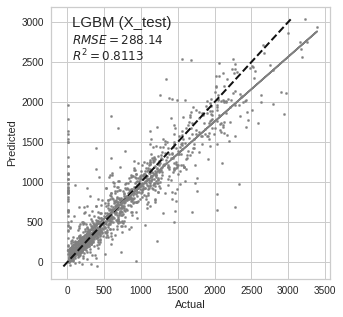

In [ ]:
'''
Exemplo de análise do RMSE com gráfico de R².
Com esse gráfico é possível identificar onde ocorrem os acertos e erros na 
predição do dados.
No exemplo abaixo note que há várias predições que deveriam ter valores próximas
a zero, porém o modelo faz a predição com valores altos.

Apesar de serem poucos casos, como a métrica avalia o quadrado dos erros, 
esses pontos pouxam a métrica para valores mais altos. Corrigindo esses
casos a métrica seria muito melhor.

'''
plot_r2(pred_train_LGBM, 'aluguéis', 'Label', title="LGBM (" + data_X + ")")

In [ ]:
# recuração das característica da configuração testada
models_desc

"Params: silent=True, session_id=666, normalize=True, normalize_method='minmax', feature_interaction=True, ; Transf: [<function transf_create_dia_util at 0x7f262f1edb00>, <function transf_create_hora_pico at 0x7f262f1ed710>, <function transf_set_feriado at 0x7f262f1db3b0>]"

In [ ]:
# métricas iniciais obtidas.
# Nos testes executados, sempre o lightgbm e o gbr apresentaram os melhores desempenhos
models_metrics

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,My_metric,TT (Sec)
lightgbm,Light Gradient Boosting Machine,160.6056,73317.3472,269.8226,0.8204,0.8386,2.7371,-269.8226,0.409
gbr,Gradient Boosting Regressor,184.8018,89043.7653,297.7082,0.7815,0.8846,3.1667,-297.7082,0.707
dt,Decision Tree Regressor,237.3560,168142.0565,408.1234,0.5860,1.1186,2.9889,-408.1234,0.048
lasso,Lasso Regression,294.9854,168999.8587,410.7026,0.5852,1.0893,3.6045,-410.7026,0.026
knn,K Neighbors Regressor,281.7068,171332.9819,412.9269,0.5794,0.9791,3.2395,-412.9269,0.069
omp,Orthogonal Matching Pursuit,339.5050,218919.9810,467.4428,0.4621,1.0907,3.7769,-467.4428,0.015


In [ ]:
# vamos guaradar os resultados dessa etapa para comparações posteriores
df_results_stored_setup = metric_get(bestModels, 'setup', models_metrics['RMSE'], [np.nan]*len(bestModels), models_metrics['R2'], [np.nan]*len(bestModels))
df_results_stored_setup


,Model,Stage,CV_RMSE,CV_RMSE_std,CV_R2,CV_R2_std,X_train_RMSE,X_train_R2,X_test_RMSE,X_test_R2,X_RMSE,X_R2
0,LGBMRegressor,setup,269.8226,NaN,0.8204,NaN,146.9831,0.9472,288.1390,0.8113,200.1092,0.9043
1,GradientBoostingRegressor,setup,297.7082,NaN,0.7815,NaN,262.8525,0.8311,313.0262,0.7773,278.8656,0.8141
2,DecisionTreeRegressor,setup,408.1234,NaN,0.5860,NaN,0.0000,1.0000,419.2691,0.6005,229.7282,0.8739
3,Lasso,setup,410.7026,NaN,0.5852,NaN,408.3235,0.5924,441.6440,0.5567,418.6057,0.5812
4,KNeighborsRegressor,setup,412.9269,NaN,0.5794,NaN,322.7074,0.7454,445.6198,0.5487,363.9947,0.6833


### Optimizing an ensemble

In [ ]:
'''
Passemos à tunagem dos modelos obtidos na fase inicial. 
Os 5 melhores modelos serão otimizados.
'''
bestModels_tuned, df_bestModels_tuned_RMSEs = pyc_eval_pycaret_tune_all(bestModels, 'aluguéis')

# print tuned models x metrics
df_bestModels_tuned_RMSEs.drop(labels='Params', axis=1).sort_values(by='RMSE', ascending = True)

Checking results on dataframe returned


,Model,RMSE,RMSE-std,R2,R2-std,Train-Mean,Train-R2,RMSE-Train,RMSE-delta
1,GradientBoostingRegressor,276.6898,19.1901,0.8111,0.0254,3.9504,1.0000,278.865613,-2.175813
0,LGBMRegressor,280.1870,22.3673,0.8064,0.0264,39.0192,0.9963,200.109241,80.077759
2,DecisionTreeRegressor,378.0078,25.5941,0.6464,0.0537,220.6580,0.8810,229.728171,148.279629
4,KNeighborsRegressor,384.8069,26.4391,0.6346,0.0483,0.0000,1.0000,363.994678,20.812222
3,Lasso,402.6227,19.1124,0.6013,0.0310,399.7767,0.6093,418.605746,-15.983046


In [ ]:
# modelos tunados e seus hiperâmetros
bestModels_tuned

[LGBMRegressor(bagging_fraction=0.9, bagging_freq=1, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=1.0,
               importance_type='split', learning_rate=0.15, max_depth=-1,
               min_child_samples=31, min_child_weight=0.001, min_split_gain=0.2,
               n_estimators=270, n_jobs=-1, num_leaves=60, objective=None,
               random_state=666, reg_alpha=0.4, reg_lambda=1, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0),
 GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                           init=None, learning_rate=0.05, loss='ls',
                           max_depth=11, max_features=1.0, max_leaf_nodes=None,
                           min_impurity_decrease=0.01, min_impurity_split=None,
                           min_samples_leaf=2, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=300,
              

In [ ]:
# print tuned models x metrics
df_bestModels_tuned_RMSEs.drop(labels='Params', axis=1).sort_values(by='RMSE', ascending = True)


,Model,RMSE,RMSE-std,R2,R2-std,Train-Mean,Train-R2,RMSE-Train,RMSE-delta
1,GradientBoostingRegressor,276.6898,19.1901,0.8111,0.0254,3.9504,1.0000,278.865613,-2.175813
0,LGBMRegressor,280.1870,22.3673,0.8064,0.0264,39.0192,0.9963,200.109241,80.077759
2,DecisionTreeRegressor,378.0078,25.5941,0.6464,0.0537,220.6580,0.8810,229.728171,148.279629
4,KNeighborsRegressor,384.8069,26.4391,0.6346,0.0483,0.0000,1.0000,363.994678,20.812222
3,Lasso,402.6227,19.1124,0.6013,0.0310,399.7767,0.6093,418.605746,-15.983046


In [ ]:
# stores metric from tuning phase
df_results_stored_tune = metric_get(bestModels_tuned, 'tuning', df_bestModels_tuned_RMSEs['RMSE'], df_bestModels_tuned_RMSEs['RMSE-std'], df_bestModels_tuned_RMSEs['R2'], df_bestModels_tuned_RMSEs['R2-std'])
df_results_stored_tune

,Model,Stage,CV_RMSE,CV_RMSE_std,CV_R2,CV_R2_std,X_train_RMSE,X_train_R2,X_test_RMSE,X_test_R2,X_RMSE,X_R2
0,LGBMRegressor,tuning,280.1870,22.3673,0.8064,0.0264,39.0192,0.9963,296.2338,0.8006,165.5634,0.9345
1,GradientBoostingRegressor,tuning,276.6898,19.1901,0.8111,0.0254,3.9504,1.0000,297.1303,0.7994,162.8388,0.9366
2,DecisionTreeRegressor,tuning,378.0078,25.5941,0.6464,0.0537,220.6580,0.8810,363.8447,0.6991,271.6919,0.8236
3,Lasso,tuning,402.6227,19.1124,0.6013,0.0310,399.7767,0.6093,433.5475,0.5728,410.2076,0.5978
4,KNeighborsRegressor,tuning,384.8069,26.4391,0.6346,0.0483,0.0000,1.0000,402.9613,0.6310,220.7927,0.8835


In [ ]:
# metrics would be exported to a persistent file (if you want)
mk_export_file(df_bestModels_tuned_RMSEs, 'models_tuned_metrics.xlsx')

In [ ]:
'''
Nas avaliações feitas os melhores resultados foram obtidos com a mistura dos
dois melhores modelos de ML (lightgbm e gbr)
'''

# blending ML chosen from tuning process
bestModel_tuned_blend = blend_models([
                                    bestModels_tuned[0],
                                    bestModels_tuned[1], 
                                    ],
                                    return_train_score = True) 

dt_results_tuned_blend = pull()


MAE         MSE      RMSE      R2   RMSLE    MAPE  \
Split    Fold                                                           
CV-Train 0      13.1111    406.5240   20.1624  0.9990  0.2563  0.1483   
         1      13.4289    467.6522   21.6253  0.9988  0.2671  0.1716   
         2      13.0847    443.8371   21.0674  0.9989  0.2699  0.1695   
         3      13.1140    430.6907   20.7531  0.9990  0.2634  0.1587   
         4      12.9559    423.0027   20.5670  0.9990  0.2662  0.1609   
         5      12.9103    436.3920   20.8900  0.9989  0.2693  0.1598   
         6      13.3858    437.0274   20.9052  0.9989  0.2749  0.1664   
         7      13.3778    462.2795   21.5007  0.9989  0.2667  0.1591   
         8      13.1133    422.0010   20.5427  0.9990  0.2655  0.1626   
         9      13.6053    474.2318   21.7769  0.9989  0.2651  0.1663   
CV-Val   0     169.9585  92946.7277  304.8717  0.7906  0.8992  4.2098   
         1     153.4846  61261.4235  247.5105  0.8592  0.8285  2.2704   
         2     146.3251  67667.4324  260.1296  0.8286  0.7464  1.9715   
         3     156.1102  70447.0297  265.4186  0.8224  0.7734  2.4162   
         4     168.3474  78676.6794  280.4936  0.8298  0.8819  3.0256   
         5     173.7299  85568.8599  292.5216  0.8024  0.9148  3.1273   
         6     142.2561  53135.6422  230.5117  0.8567  0.7834  2.3026   
         7     167.5083  76969.8086  277.4343  0.8081  0.7703  2.1750   
         8     160.0089  79344.4217  281.6814  0.7832  0.7500  2.0792   
         9     148.3799  73853.6809  271.7603  0.8043  0.7954  3.1157   
CV-Train Mean   13.2087    440.3639   20.9791  0.9989  0.2664  0.1623   
         Std     0.2149     20.7081    0.4925  0.0000  0.0046  0.0063   
CV-Val   Mean  158.6109  73987.1706  271.2333  0.8185  0.8143  2.6693   
         Std    10.4350  10965.4388   20.4854  0.0244  0.0598  0.6593   
Train    NaN    13.5846    430.4642   20.7476  0.9989  0.2588  0.1616   

               My_metric  
Split    Fold             
CV-Train 0      -20.1624  
         1      -21.6253  
         2      -21.0674  
         3      -20.7531  
         4      -20.5670  
         5      -20.8900  
         6      -20.9052  
         7      -21.5007  
         8      -20.5427  
         9      -21.7769  
CV-Val   0     -304.8717  
         1     -247.5105  
         2     -260.1296  
         3     -265.4186  
         4     -280.4936  
         5     -292.5216  
         6     -230.5117  
         7     -277.4343  
         8     -281.6814  
         9     -271.7603  
CV-Train Mean   -20.9791  
         Std      0.4925  
CV-Val   Mean  -271.2333  
         Std     20.4854  
Train    NaN    -20.7476

In [ ]:
# stores metric from blending process (best 02)
df_results_stored_tune_blend = metric_get([bestModel_tuned_blend], 'blend', 
                dt_results_tuned_blend.loc['CV-Val','Mean'][['RMSE']], dt_results_tuned_blend.loc['CV-Val','Std'][['RMSE']]
                  , dt_results_tuned_blend.loc['CV-Val','Mean'][['R2']], dt_results_tuned_blend.loc['CV-Val','Std'][['R2']])
df_results_stored_tune_blend

,Model,Stage,CV_RMSE,CV_RMSE_std,CV_R2,CV_R2_std,X_train_RMSE,X_train_R2,X_test_RMSE,X_test_R2,X_RMSE,X_R2
0,VotingRegressor,blend,271.2333,20.4854,0.8185,0.0244,20.7476,0.9989,289.3307,0.8098,159.4789,0.9392


In [ ]:
'''
Outra possibilidade seria mesclar os três melhores modelos tunados
'''

# blending ML chosen from tuning process
bestModel_tuned_blend03 = blend_models([
                                    bestModels_tuned[0],
                                    bestModels_tuned[1], 
                                    bestModels_tuned[2], 
                                    ],
                                    return_train_score = True) 

dt_results_tuned_blend03 = pull()



MAE          MSE      RMSE      R2   RMSLE    MAPE  \
Split    Fold                                                            
CV-Train 0      98.4065   19368.0631  139.1692  0.9522  0.6744  1.2168   
         1      98.1057   19522.7682  139.7239  0.9519  0.6806  1.2918   
         2      99.1529   19682.0880  140.2929  0.9521  0.6796  1.2774   
         3      99.6990   19877.6918  140.9883  0.9516  0.6854  1.3030   
         4      98.4685   19284.6829  138.8693  0.9522  0.6689  1.2386   
         5      97.8201   19256.2691  138.7670  0.9526  0.6738  1.2564   
         6      99.5720   19775.5853  140.6257  0.9521  0.6822  1.2887   
         7      99.4439   19782.1602  140.6491  0.9517  0.6865  1.2989   
         8      98.9719   19545.5842  139.8055  0.9528  0.6802  1.2716   
         9      99.0579   19610.4074  140.0372  0.9525  0.6821  1.2708   
CV-Val   0     188.6906   95928.1125  309.7226  0.7839  0.9288  4.3944   
         1     181.8693   74654.2005  273.2292  0.8284  0.8999  2.5950   
         2     170.1476   74145.0546  272.2959  0.8122  0.8484  2.5067   
         3     170.3376   73906.6410  271.8578  0.8137  0.7989  2.3963   
         4     188.5139   90550.0572  300.9154  0.8041  0.9189  3.3324   
         5     201.5339  100631.4059  317.2245  0.7676  0.9388  3.2666   
         6     165.4925   65428.6992  255.7903  0.8236  0.8685  2.6370   
         7     184.1083   81903.7099  286.1882  0.7958  0.7534  2.2676   
         8     184.0393   83564.6203  289.0755  0.7717  0.8221  2.4910   
         9     176.5136   86878.2141  294.7511  0.7698  0.8339  3.2623   
CV-Train Mean   98.8698   19570.5300  139.8928  0.9522  0.6794  1.2714   
         Std     0.6081     204.8374    0.7325  0.0004  0.0052  0.0261   
CV-Val   Mean  181.1247   82759.0715  287.1051  0.7971  0.8612  2.9149   
         Std    10.2412   10442.6475   18.1593  0.0216  0.0578  0.6182   
Train    NaN    99.0427   19543.0526  139.7965  0.9522  0.6838  1.2699   

               My_metric  
Split    Fold             
CV-Train 0     -139.1692  
         1     -139.7239  
         2     -140.2929  
         3     -140.9883  
         4     -138.8693  
         5     -138.7670  
         6     -140.6257  
         7     -140.6491  
         8     -139.8055  
         9     -140.0372  
CV-Val   0     -309.7226  
         1     -273.2292  
         2     -272.2959  
         3     -271.8578  
         4     -300.9154  
         5     -317.2245  
         6     -255.7903  
         7     -286.1882  
         8     -289.0755  
         9     -294.7511  
CV-Train Mean  -139.8928  
         Std      0.7325  
CV-Val   Mean  -287.1051  
         Std     18.1593  
Train    NaN   -139.7965

In [ ]:
# stores metric from blending process (best 03)
df_results_stored_tune_blend03 = metric_get([bestModel_tuned_blend03], 'blend03', 
                dt_results_tuned_blend03.loc['CV-Val','Mean'][['RMSE']], dt_results_tuned_blend03.loc['CV-Val','Std'][['RMSE']]
                  , dt_results_tuned_blend03.loc['CV-Val','Mean'][['R2']], dt_results_tuned_blend03.loc['CV-Val','Std'][['R2']])
df_results_stored_tune_blend03


,Model,Stage,CV_RMSE,CV_RMSE_std,CV_R2,CV_R2_std,X_train_RMSE,X_train_R2,X_test_RMSE,X_test_R2,X_RMSE,X_R2
0,VotingRegressor,blend03,286.3993,18.5064,0.7981,0.0219,139.7508,0.9523,309.8951,0.7818,206.1521,0.8984


In [ ]:
'''
Uma outra abordagem para mesclar modelos seria o usado da técnica de stacking.
Durante a competição essa técnica não foi usada, porém após o término da 
competição esse modelo gerou um desempenho um pouco melhor do que a técnica 
de voting.
'''

bestModel_tuned_stack = stack_models([
                                     bestModels_tuned[0],
                                     bestModels_tuned[1], 
                                     ],
                                     return_train_score = True) 

dt_results_tuned_stack = pull()

MAE         MSE      RMSE      R2   RMSLE    MAPE  \
Split    Fold                                                           
CV-Train 0      26.1738   1300.6595   36.0647  0.9968  0.3551  0.2711   
         1      30.5683   1867.2603   43.2118  0.9954  0.4079  0.3694   
         2      28.7800   1575.7515   39.6957  0.9962  0.3817  0.3224   
         3      25.3263   1263.3023   35.5430  0.9969  0.3937  0.2816   
         4      27.3842   1485.6775   38.5445  0.9963  0.3696  0.2985   
         5      26.4825   1410.2474   37.5533  0.9965  0.3730  0.2995   
         6      29.7616   1824.1922   42.7106  0.9956  0.4072  0.3571   
         7      33.6741   2329.5279   48.2652  0.9943  0.4238  0.4042   
         8      27.7871   1495.3800   38.6701  0.9964  0.3819  0.2805   
         9      29.2604   1709.8803   41.3507  0.9959  0.4011  0.3212   
CV-Val   0     169.5212  92873.4647  304.7515  0.7907  0.8876  4.1883   
         1     157.7724  63966.4486  252.9159  0.8529  0.8390  2.3261   
         2     146.4266  67913.4425  260.6021  0.8280  0.7631  2.0749   
         3     155.3758  68150.1693  261.0559  0.8282  0.7693  2.3487   
         4     166.2560  77080.3614  277.6335  0.8333  0.8973  2.9772   
         5     174.0325  85439.5210  292.3004  0.8027  0.9233  3.0626   
         6     145.9208  54046.0190  232.4780  0.8543  0.8010  2.2928   
         7     171.2478  77972.4831  279.2355  0.8056  0.8128  2.1641   
         8     161.4094  77817.6943  278.9582  0.7874  0.7546  2.0673   
         9     151.5410  74068.3450  272.1550  0.8038  0.8057  3.0864   
CV-Train Mean   28.5198   1626.1879   40.1610  0.9960  0.3895  0.3206   
         Std     2.3367    303.7591    3.6450  0.0007  0.0199  0.0415   
CV-Val   Mean  159.9503  73932.7949  271.2086  0.8187  0.8254  2.6588   
         Std     9.6723  10473.6530   19.4600  0.0229  0.0566  0.6374   
Train    NaN    24.1100   1089.0723   33.0011  0.9973  0.3560  0.2540   

               My_metric  
Split    Fold             
CV-Train 0      -36.0647  
         1      -43.2118  
         2      -39.6957  
         3      -35.5430  
         4      -38.5445  
         5      -37.5533  
         6      -42.7106  
         7      -48.2652  
         8      -38.6701  
         9      -41.3507  
CV-Val   0     -304.7515  
         1     -252.9159  
         2     -260.6021  
         3     -261.0559  
         4     -277.6335  
         5     -292.3004  
         6     -232.4780  
         7     -279.2355  
         8     -278.9582  
         9     -272.1550  
CV-Train Mean   -40.1610  
         Std      3.6450  
CV-Val   Mean  -271.2086  
         Std     19.4600  
Train    NaN    -33.0011

In [ ]:
# stores metric from blending process (best 02)
df_results_stored_tune_stack = metric_get([bestModel_tuned_stack], 'stack', 
                dt_results_tuned_stack.loc['CV-Val','Mean'][['RMSE']], dt_results_tuned_stack.loc['CV-Val','Std'][['RMSE']]
                  , dt_results_tuned_stack.loc['CV-Val','Mean'][['R2']], dt_results_tuned_stack.loc['CV-Val','Std'][['R2']])
df_results_stored_tune_stack

,Model,Stage,CV_RMSE,CV_RMSE_std,CV_R2,CV_R2_std,X_train_RMSE,X_train_R2,X_test_RMSE,X_test_R2,X_RMSE,X_R2
0,StackingRegressor,stack,271.2086,19.46,0.8187,0.0229,33.0011,0.9973,289.2365,0.8099,160.8665,0.9381


#### Results - put all together

In [ ]:
'''
Em cada fase da construção do modelo as respectivas métricas foram salvas.
Neste ponto, todas as métricas são colocada em um dataframe e exportados 
para um arquivo Excel.

No Excel os dados poderão ser analisados para decidir qual deles gerou
o melhor desempenho.
'''
df_results_stored_all = pd.DataFrame()

df_results_stored_all = pd.concat([df_results_stored_all, df_results_stored_setup])
df_results_stored_all = pd.concat([df_results_stored_all, df_results_stored_tune])
df_results_stored_all = pd.concat([df_results_stored_all, df_results_stored_tune_blend])
df_results_stored_all = pd.concat([df_results_stored_all, df_results_stored_tune_stack])

df_results_stored_all = df_results_stored_all.reset_index().drop(labels='index', axis=1)
df_results_stored_all.sort_values(by='CV_R2', ascending = False)




,Model,Stage,CV_RMSE,CV_RMSE_std,CV_R2,CV_R2_std,X_train_RMSE,X_train_R2,X_test_RMSE,X_test_R2,X_RMSE,X_R2
0,LGBMRegressor,setup,269.8226,NaN,0.8204,NaN,146.9831,0.9472,288.1390,0.8113,200.1092,0.9043
10,VotingRegressor,blend,270.9490,19.4894,0.8190,0.0230,20.8219,0.9989,289.7304,0.8092,159.7033,0.9390
11,StackingRegressor,stack,271.2086,19.4600,0.8187,0.0229,33.0011,0.9973,289.2365,0.8099,160.8665,0.9381
6,GradientBoostingRegressor,tuning,276.2557,16.6383,0.8119,0.0218,4.1835,1.0000,297.6710,0.7986,163.1391,0.9364
5,LGBMRegressor,tuning,280.1870,22.3673,0.8064,0.0264,39.0192,0.9963,296.2338,0.8006,165.5634,0.9345
1,GradientBoostingRegressor,setup,297.8298,NaN,0.7814,NaN,262.8525,0.8311,312.9755,0.7774,278.8485,0.8141
9,DecisionTreeRegressor,tuning,376.4126,23.1118,0.6496,0.0501,221.0440,0.8806,362.9669,0.7006,271.5589,0.8237
8,KNeighborsRegressor,tuning,384.8069,26.4391,0.6346,0.0483,0.0000,1.0000,402.9613,0.6310,220.7927,0.8835
7,Lasso,tuning,402.8239,19.0176,0.6009,0.0308,399.9735,0.6089,433.5076,0.5729,410.3291,0.5976
2,Lasso,setup,410.7011,NaN,0.5852,NaN,408.3220,0.5924,441.6426,0.5567,418.6043,0.5812


In [ ]:
mk_export_file(df_results_stored_all, "metrics_results_stored_all.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

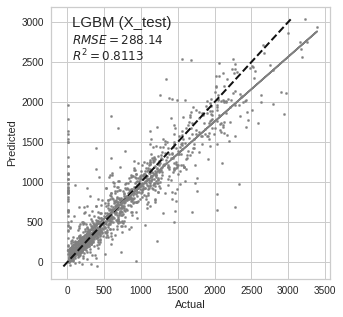

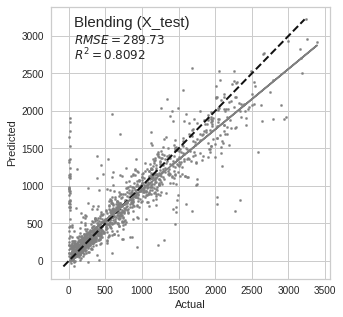

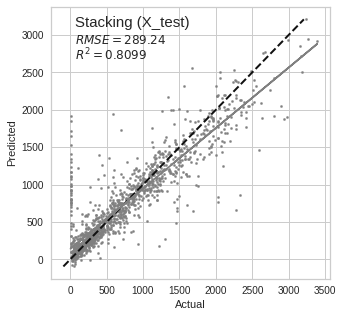

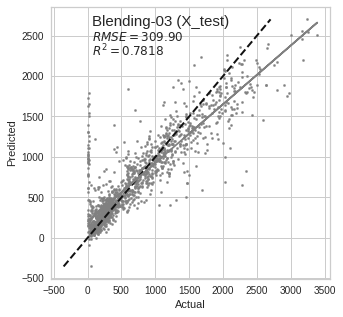

In [ ]:
'''
A título de exemplo, o trecho abaixo analisa 03 modelos com os dados de testes
separados pelo PyCaret (esses dados não foram usados no treinamento). Dessa
forma, é possível ter uma ideia de como o modelo treinado está respondendo 
a dados desconhecidos.

Seria uma prévia de como o modelo se sairia na competição.

Pelos dados dos abaixo ilustrados, o melhor modelo seria o lightgbm, contudo
aplicando os dados de teste da competição esse modelo obteve um desempenho 
que "top10", porém acima da 5ª posição.

O melhor resultado na competição foi obtido pelo modelo de stacking com os
dois melhores modelos tunados, que o foi o segundo melhor modelo segundo as
avaliações abaixo.

Na pratica, o modelo submetido foi o blending com os dois melhores modelos 
tunados.

Como sei que o stacking teria um desempenho melhor, mesmo finalizada a competição?
Com a ajuda do Rafael Batista tivesse a um playground para rodar alguns testes.
Essa ferramenta estará liberada em breve para todos!
'''
data_X = 'X_test'
pred_train_LGBM = predict_model(bestModels[0], data=df_train.iloc[list(get_config(data_X).index)]);
pred_train_blending = predict_model(bestModel_tuned_blend, data=df_train.iloc[list(get_config(data_X).index)]);
pred_train_stacking = predict_model(bestModel_tuned_stack, data=df_train.iloc[list(get_config(data_X).index)]);
pred_train_blending03 = predict_model(bestModel_tuned_blend03, data=df_train.iloc[list(get_config(data_X).index)]);
clear_output()

plot_r2(pred_train_LGBM, 'aluguéis', 'Label', title="LGBM (" + data_X + ")")
plot_r2(pred_train_blending, 'aluguéis', 'Label', title="Blending (" + data_X + ")")
plot_r2(pred_train_stacking, 'aluguéis', 'Label', title="Stacking (" + data_X + ")")
plot_r2(pred_train_blending03, 'aluguéis', 'Label', title="Blending-03 (" + data_X + ")")

## Checking score

Nessa etapa escolhemos um modelo de machine learning para as análise finais. Nos próximos exemplos foi escolhido o modelo de blending com os dois melhores tunados.

In [ ]:
# rodar a pipeline para o modelo de configuração escolhido

df_train, df_test = mk_dataset_refresh()
df_train = pyc_eval_feat_transf_run(14, df_train)


pyc_eval_feat_transf_run -> Model to run: 14
Dataset transformation: transf_create_dia_util
after transf: df=Index(['hora', 'dia', 'feriado', 'estação', 'temperatura', 'chuva', 'umidade',
       'sol', 'visibilidade', 'vento', 'aluguéis', 'dia_util'],
      dtype='object')
Dataset transformation: transf_create_hora_pico
after transf: df=Index(['hora', 'dia', 'feriado', 'estação', 'temperatura', 'chuva', 'umidade',
       'sol', 'visibilidade', 'vento', 'aluguéis', 'dia_util', 'hora_pico'],
      dtype='object')
Dataset transformation: transf_rem_feriado
after transf: df=Index(['hora', 'dia', 'feriado', 'estação', 'temperatura', 'chuva', 'umidade',
       'sol', 'visibilidade', 'vento', 'aluguéis', 'dia_util', 'hora_pico'],
      dtype='object')


In [ ]:
'''
A partir deste ponto o modelo de trabalho é aquele
que está na variável model_chosen
'''

# bestModel_tuned_blend
# model_chosen = bestModels[0]
#model_chosen = bestModel_tuned_stack
model_chosen = bestModel_tuned_blend

In [ ]:
'''
Avaliação do RMSE considerando todos os dados de treinamento (just checking...)
'''
pred_train = predict_model(model_chosen, data = df_train);
clear_output()
base = pull();
print(f'f1(df_train)={base.RMSE[0]}')


f1(df_train)=159.4789


In [ ]:
'''
Amostra de como são apresentados os dados depois da predição.
Note que há uma feature nova no dataset (Label)
'''
pred_train.head(3)

,hora,dia,feriado,estação,temperatura,chuva,umidade,sol,visibilidade,vento,aluguéis,dia_util,hora_pico,Label
0,16,sábado,não,verão,39.4,0.0,61.1,2.19,0.92,3.49,1318,não,sim,1313.133748
1,21,sexta,não,primavera,22.2,0.0,63.3,0.00,0.32,2.89,686,sim,não,758.081367
2,16,segunda,não,verão,40.5,0.0,52.8,2.51,0.93,3.97,831,sim,não,864.486045


#### min, max, mean

Os passos dessa subseção estão inativos, pois não apresentaram bons resultados.

A ideia aqui era tentar controlar as predições para que elas ficassem dentre de limites observados nos dados de treinamento. Contudo essa estratégia não funcionou.

In [ ]:
if False:
    df_minmax = df_train.copy()
    aux_set_list_temperatura_cat10(df_minmax, 10, 'temperatura')
    df_minmax = transf_create_temperatura_cat10(df_minmax, include_new_Col=True)
    hourAggregated_max = pd.DataFrame(df_minmax.groupby(["hora",'estação','dia','feriado', 'temperatura_cat'],sort=True)["aluguéis"].max()).reset_index()
    hourAggregated_min = pd.DataFrame(df_minmax.groupby(["hora",'estação','dia','feriado', 'temperatura_cat'],sort=True)["aluguéis"].min()).reset_index()
    hourAggregated_mean = pd.DataFrame(df_minmax.groupby(["hora",'estação','dia','feriado', 'temperatura_cat'],sort=True)["aluguéis"].mean()).reset_index()
    hourAggregated_max

In [ ]:
if False:
    pred_train = transf_create_temperatura_cat10(pred_train, include_new_Col=True)
    pred_train_minmax = check_minmax(pred_train)
    # pred_train_minmax.Label_new.isnull().value_counts()

In [ ]:
if False:
    pred_train_minmax = set_new_label(pred_train_minmax)
    pred_train_minmax.Label_new.isnull().value_counts()

In [ ]:
if False:
    pred_train_minmax[pred_train_minmax.Label_new.isnull()]

In [ ]:
if False:
    # Using sklearn

    print (r2_score(pred_train_minmax['aluguéis'], pred_train_minmax['Label']))
    print (r2_score(pred_train_minmax['aluguéis'], pred_train_minmax['Label_new']))

In [ ]:
if False:
    df=pred_train_minmax.copy()
    # df = df[df['estação'] == 'outono']
    plot_r2(df, 'aluguéis', 'Label_new')

In [ ]:
if False:
    plot_r2(pred_train_minmax, 'aluguéis', 'Label')

In [ ]:
if False:
    (pred_train_minmax['Label_new'] == pred_train_minmax['Label']).value_counts()

In [ ]:
if False:
    mk_export_file(pred_train_minmax, "_pred_train_minmax.xlsx")

### Checking score

In [ ]:
'''
Final inspection on the chosen model
'''

# Checking performance (RMSE) using training data (X_Test)
pred = predict_model(model_chosen)


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,My_metric
0,Voting Regressor,163.2786,83712.2825,289.3307,0.8098,0.8871,3.4155,-289.3307


In [ ]:
model_chosen

VotingRegressor(estimators=[('lightgbm',
                             LGBMRegressor(bagging_fraction=0.9, bagging_freq=1,
                                           boosting_type='gbdt',
                                           class_weight=None,
                                           colsample_bytree=1.0,
                                           feature_fraction=1.0,
                                           importance_type='split',
                                           learning_rate=0.15, max_depth=-1,
                                           min_child_samples=31,
                                           min_child_weight=0.001,
                                           min_split_gain=0.2, n_estimators=270,
                                           n_jobs=-1, num_leaves=60,
                                           objective=None, rand...
                                                       max_features=1.0,
                                                      

In [ ]:
'''
Durante a competição sempre foi avaliado o RMSE e tambném o gráfico de R², que 
no PyCaret é obtido pelo Predction Error. Essa avaliação era feita para 
se ter ideia de como o modelo estava predizendo os valores, ou seja,
onde estava acertando mais e, principalmente, onde estava errando mais.

Todas as tentativas, muitas frustradas, eram para melhorar o modelo gerando
um gráfico de R² com predições mais regulares. As tentativas visavam diminuir
os erros (pontos deslocados da linha identidade).
'''
evaluate_model(model_chosen)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

## Saving the model

Com o modelo de machine learning escolhido, passamos para a última etapa do projeto, a finalização do modelo PyCaret para treinar o algoritmo com todos os dados de treinamento e salvamento da pipeline para processar dos dados a serem processaodos pelo modelo.

In [ ]:
model_name = 'Best_Sub'
config_name = 'Best_Conf'

In [ ]:
# model_work = ensemble_model
model_work = model_chosen

In [ ]:
# finalizing the model
model_final = finalize_model(model_work)


In [ ]:
# save config
save_config(config_name)
mk_export_file([], config_name, typeOfFile='')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# save model
save_model(model_final, model_name)
mk_export_file([], model_name + '.pkl', typeOfFile='')


Transformation Pipeline and Model Successfully Saved


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Loading the model

Neste ponto você poderá carregar o modelo que eu salvei pouco antes de enviar a minha melhor submissão.

Carregue o arquivo na pasta do colab e execute os próximos passos.

In [ ]:
load_config(config_name)

In [ ]:
# Loading the salved model
model_loaded = load_model(model_name)

Transformation Pipeline and Model Successfully Loaded


In [ ]:
'''
Recarregar os datasets para serem usados no modelo carregado.

Neste ponto também é necessários executar as transformações usadas no modelo
de configuração que gerou o melhor desempenho (modelo #14). A função criada
para tratar esse "pipeline" foi a pyc_eval_feat_transf_run. 
'''
df_train, df_test = mk_dataset_refresh()
df_train = pyc_eval_feat_transf_run(14, df_train)

pyc_eval_feat_transf_run -> Model to run: 14
Dataset transformation: transf_create_dia_util
after transf: df=Index(['hora', 'dia', 'feriado', 'estação', 'temperatura', 'chuva', 'umidade',
       'sol', 'visibilidade', 'vento', 'aluguéis', 'dia_util'],
      dtype='object')
Dataset transformation: transf_create_hora_pico
after transf: df=Index(['hora', 'dia', 'feriado', 'estação', 'temperatura', 'chuva', 'umidade',
       'sol', 'visibilidade', 'vento', 'aluguéis', 'dia_util', 'hora_pico'],
      dtype='object')
Dataset transformation: transf_rem_feriado
after transf: df=Index(['hora', 'dia', 'feriado', 'estação', 'temperatura', 'chuva', 'umidade',
       'sol', 'visibilidade', 'vento', 'aluguéis', 'dia_util', 'hora_pico'],
      dtype='object')


In [ ]:
'''
Breve verificação para avaliar o RMSE do modelo final treinado.

O resultado mostra que o RMSE é baixo, porém ao aplicar da base de teste
e submetê-los à avaliação na competição o RMSE é relativamente algo, isso 
mostra que o modelo "memorizou os dados de treinamento" e "perdeu a 
capacidade de generalização", ou seja, o modelo apresenta overfitting.

Como resolver isso?
Fica como "lição de casa" para quem chegou até aqui! ;-)
'''
pred_train = predict_model(model_loaded, data = df_train);
base = pull();
print(f'f1(df_train)={base.RMSE[0]}')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,17.71,650.0825,25.4967,0.9984,0.3073,0.2076


f1(df_train)=25.4967


In [ ]:
df_results_stored_final = metric_get([model_loaded], 'final', base['RMSE'], [np.nan]*len(bestModels), base['R2'], [np.nan]*len(bestModels))

In [ ]:
df_results_stored_all = pd.concat([df_results_stored_all, df_results_stored_final])

df_results_stored_all = df_results_stored_all.reset_index().drop(labels='index', axis=1)
df_results_stored_all.sort_values(by='CV_R2', ascending = False)


,Model,Stage,CV_RMSE,CV_RMSE_std,CV_R2,CV_R2_std,X_train_RMSE,X_train_R2,X_test_RMSE,X_test_R2,X_RMSE,X_R2
13,Pipeline,final,46.2706,NaN,0.9949,NaN,46.2527,0.9948,46.3123,0.9951,46.2706,0.9949
12,Pipeline,final,170.2462,NaN,0.9307,NaN,168.6447,0.9305,173.9219,0.9313,170.2462,0.9307
0,LGBMRegressor,setup,269.8226,NaN,0.8204,NaN,146.9831,0.9472,288.1390,0.8113,200.1092,0.9043
10,VotingRegressor,blend,270.9490,19.4894,0.8190,0.0230,20.8219,0.9989,289.7304,0.8092,159.7033,0.9390
11,StackingRegressor,stack,271.2086,19.4600,0.8187,0.0229,33.0011,0.9973,289.2365,0.8099,160.8665,0.9381
6,GradientBoostingRegressor,tuning,276.2557,16.6383,0.8119,0.0218,4.1835,1.0000,297.6710,0.7986,163.1391,0.9364
5,LGBMRegressor,tuning,280.1870,22.3673,0.8064,0.0264,39.0192,0.9963,296.2338,0.8006,165.5634,0.9345
1,GradientBoostingRegressor,setup,297.8298,NaN,0.7814,NaN,262.8525,0.8311,312.9755,0.7774,278.8485,0.8141
9,DecisionTreeRegressor,tuning,376.4126,23.1118,0.6496,0.0501,221.0440,0.8806,362.9669,0.7006,271.5589,0.8237
8,KNeighborsRegressor,tuning,384.8069,26.4391,0.6346,0.0483,0.0000,1.0000,402.9613,0.6310,220.7927,0.8835


In [ ]:
'''
Depois de rodar todos modelos treinados e obter as respectivas métricas temos
todos os dados armazenasdos. Uma prática adotada neste projeto foi exportar
os dados para formato Excel, então analisá-los fora do Colab.
'''
mk_export_file(df_results_stored_all, "metrics_results_stored_final.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##### check min, max (train)

Como já comentado em outro trecho deste notebook, algumas tentativas para tratar dados foram aplicadas, porém sem sucesso.

Os trechos abaixo eram parte de uma estratégia para limitar valores mínimos e máximos das predições baseadas em dados obtidos do treinamento agrupados por estações e horas.

O código não foi removido, porém está inativo.

In [ ]:
if False:
    pred_train = transf_create_temperatura_cat10(pred_train, include_new_Col=True)
    pred_train_minmax = check_minmax(pred_train)
    # pred_train_minmax.Label_new.isnull().value_counts()

In [ ]:
if False:
    pred_train_minmax

In [ ]:
if False:
    pred_train_minmax = set_new_label(pred_train_minmax)
    pred_train_minmax.Label_new.isnull().value_counts()

In [ ]:
if False:
    print(mean_squared_error(pred_train_minmax['aluguéis'], pred_train_minmax['Label'], squared=False))
    print(mean_squared_error(pred_train_minmax['aluguéis'], pred_train_minmax['Label_new'], squared=False))

In [ ]:
if False:
    (pred_train_minmax['Label'] < 0).value_counts()

In [ ]:
if False:
    (pred_train_minmax['Label_new'] < 0).value_counts()

In [ ]:
if False:
    for indice, linha in pred_train.iterrows():
        if linha['Label'] < 0 :
            # pred_train.loc[indice, 'Label'] = best_guess(linha['hora'], linha['dia'], linha['estação'])
            pred_train.loc[indice, 'Label'] = target_min


In [ ]:
if False:
    plot_r2(pred_train, 'aluguéis', 'Label', title="Finalized Model (df_train)")

### eval negatives

In [ ]:
'''
Avaliação de eventuais predições negativas.
'''
(pred_train['Label'] < 0).value_counts()

False    4487
True       13
Name: Label, dtype: int64

Exportação do dataset de treino com os valores preditos.

Com o arquivo exportado é possível analisar quais predições foram corretas.


In [ ]:
mk_export_file(pred_train, model_name + "_pred_train.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### predict test

In [ ]:
'''
De forma semelhantes à avaliação feita para os dados de treinamento,
passamos então ao tratamento dos dados de testes, aqueles que são 
desconhecidos do modelo treinado e que serão usados para gerar
as predições para a submissão na competição.
'''
df_train, df_test = mk_dataset_refresh()
df_test = pyc_eval_feat_transf_run(14, df_test)

pyc_eval_feat_transf_run -> Model to run: 14
Dataset transformation: transf_create_dia_util
after transf: df=Index(['hora', 'dia', 'feriado', 'estação', 'temperatura', 'chuva', 'umidade',
       'sol', 'visibilidade', 'vento', 'dia_util'],
      dtype='object')
Dataset transformation: transf_create_hora_pico
after transf: df=Index(['hora', 'dia', 'feriado', 'estação', 'temperatura', 'chuva', 'umidade',
       'sol', 'visibilidade', 'vento', 'dia_util', 'hora_pico'],
      dtype='object')
Dataset transformation: transf_rem_feriado
after transf: df=Index(['hora', 'dia', 'feriado', 'estação', 'temperatura', 'chuva', 'umidade',
       'sol', 'visibilidade', 'vento', 'dia_util', 'hora_pico'],
      dtype='object')


In [ ]:
pred_test = predict_model(model_loaded, data=df_test)
pred_test.head(5)

,hora,dia,feriado,estação,temperatura,chuva,umidade,sol,visibilidade,vento,dia_util,hora_pico,Label
0,21,quinta,não,verão,33.3,0.12,72.4,0.0,0.88,2.05,sim,não,877.402335
1,0,segunda,não,outono,25.0,0.00,73.1,0.0,0.34,0.85,sim,não,493.047584
2,4,segunda,não,outono,22.1,0.00,67.9,0.0,0.97,1.09,sim,não,135.575559
3,6,terça,não,verão,36.5,0.00,80.7,0.0,0.53,1.93,sim,não,584.082776
4,21,quinta,não,verão,34.2,0.00,65.6,0.0,0.71,2.05,sim,não,2170.976104


### min, max, mean - test

In [ ]:
if False:
    pred_test = transf_create_temperatura_cat10(pred_test, include_new_Col=True)
    pred_test_minmax = check_minmax(pred_test)

In [ ]:
if False:
    pred_test_minmax

In [ ]:
if False:
    pred_test_minmax = set_new_label(pred_test_minmax)
    pred_test_minmax.Label_new.isnull().value_counts()

In [ ]:
if False:
    pred_test_minmax

In [ ]:
if False:
    (pred_test_minmax['Label_new'] < 0).value_counts()

### eval negatives

In [ ]:
'''
Avaliação de eventuais predições com valores negativos
'''
(pred_test['Label'] < 0).value_counts()

False    2988
True       12
Name: Label, dtype: int64

In [ ]:
'''
Para os valores negativos foi usada a estratégia de trocá-los
pelo menor valor positivo encontrada na base de treinamento.
'''
target_min = df_train['aluguéis'].min()
target_min

5

In [ ]:
'''
Exportação do arquivo de predição para os dados de teste
'''

mk_export_file(pred_test, model_name + "_pred_test.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
'''
Troca das predições com valores negativos pelo menor valor positivo
encontrado na base de treinamento
'''
for indice, linha in pred_test.iterrows():
    if linha['Label'] < 0 :
        # pred_train.loc[indice, 'Label'] = best_guess(linha['hora'], linha['dia'], linha['estação'])
        print('idx=', indice, 'val=', pred_test.loc[indice, 'Label'])
        pred_test.loc[indice, 'Label'] = target_min
        

idx= 572 val= -1.23225936424544
idx= 728 val= -5.492813418533515
idx= 1107 val= -51.71006004836171
idx= 1546 val= -62.04254519910357
idx= 1732 val= -12.185932834311927
idx= 1941 val= -1.8101189741841708
idx= 1980 val= -63.10369565805048
idx= 1997 val= -14.524601133985586
idx= 2173 val= -3.1234341206302503
idx= 2264 val= -93.22671075453172
idx= 2328 val= -14.671368480282451
idx= 2414 val= -50.18593772151064


In [ ]:
'''
Double-check para garantir que todos os valores para a submissão são positivos
'''
(pred_test['Label'] < 0).value_counts()

False    3000
Name: Label, dtype: int64

## Submission file

In [ ]:
subm = pd.DataFrame()
subm['aluguéis'] = pred_test['Label']


In [ ]:
(subm['aluguéis'] < 0).value_counts()

False    3000
Name: aluguéis, dtype: int64

Exportação do arquivo para submissão

In [ ]:
'''
Exportação do arquivo de submissão
'''
mk_export_file(subm, model_name + '_sub.csv', typeOfFile='csv')   

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>